# Data Scientist Capstone  - Exploration of PISA 2022 Dataset
## by datacamp442

## Section 1: Project Definition
### 1.1 Project Overview and Motivation
PISA (Program for International Student Assessment) is the largest international school performance study. Almost 700,000 students from 81 countries and regions took part in 2022. PISA does not ask for factual knowledge, but rather tests whether participants can apply their knowledge and combine information in a meaningful way - key skills for being successful in the information society of the 21st century. The PISA study takes place every three years and covers the areas of reading, mathematics and science (https://www.oecd.org/berlin/themen/pisa-studie/). 

The OECD publishes the data from the Pisa studies on its website as SAS data file:

https://www.oecd.org/pisa/data/2022database

Since I already had the pleasure of examining the PISA study 2012 during my previous Udacity certification as a Data Analyst (PART_I_exploration_PISA_study_data442camp442.html, not published, submitted to UDACITY in 10/2022), I wanted to build on this and take a closer look at the current study from 2022. In particular, the focus of the 2012 PISA study was on visual data analysis. In this current analysis, I will re-run some of the visual analysis. Then I want to apply machine learning models and try to make predictions on math and reading scores.

I will focus my analysis on the survey of students from EU and EFTA countries. Due to the size of the original SAS file, only the data already reduced to the selected countries and necessary columns is used within this analysis.

### 1.2 Problem Statement

My central questions are: 

#### To what extent does the students' family background influence the students results in the PISA study?


#### Is it possible to predict the read and math score based on the students' family background?



This work examines the extent to which the math and read score result of the PISA study depends on
- the level of education of the parents, 
- the presence of siblings at Home, 
- gender and 
- country (EU and EFTA countries only)

Finally, I would like to find out whether the read and math score can be predicted using the available data on the family situation.

### 1.3 Data

I'm primarily interested in the influence of the parents and siblings on the students math and reading results. 

So first I need the pupils performance in mathematics and reading (PV1MATH, PV1READ).

Further I will focus on the following information:

- the gender of the student (ST004D01T - Gender)
- the country of the student (CNT - Country). Here I will focus on students of european countries only (EU and EFTA countries).
- the presence of siblings at home (ST230Q01JA- SIBLING)
- the level of education of the parents (MISCED: mother, FISCED: father);

### 1.4 Problem solving strategy

First, an initial analysis is carried out using data visualizations:
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

As I want to predict a continuous output variable (math and reading score are a floating point value), a Regression predictive modeling is the right choice.

I will try to improve the metrics defined in the next section. 
For this I will try different Regression models on the data and will use cross-validation to find the best parameters.

Following regression models I will use in my analysis: 
- RandomForestRegressor (a sklearn ensemble)
- GradientBoostingRegressor  (a sklearn ensemble)

Please note that I have decided against a multi-regression model because, in my opinion, a separate consideration of independent models is necessary due to the child's respective abilities, some of which cannot be influenced (e.g. the presence of dyslexia or dyscalculia).

### 1.5 Regression Metrics

Metrics for regression involve calculating an error score to summarize the predictive skill of a model.

I use the following metrics in my analysis:

###### Mean Squared Error (MSE): 
- The mean squared error measures the average squared difference between the predicted and actual values.
- MSE is useful when the spread of forecast values ​​is important and larger values ​​need to be normalized. However, this metric is often difficult to interpret because it is a squared value.

###### Root Mean Squared Error (RMSE):
- The Root Mean Squared Error (RMSE) is the square root of the average squared difference between the predicted and actual values, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.
- The lower the RMSE value, the better the model.
- RMSE is useful when variation is important and extreme values ​​need to be normalized. RMSE is easier to interpret compared to MSE because the RMSE value has the same scale as the predicted values.
  
###### Mean Absolute Error (MAE):
- The Mean Absolute Error is defined as the average of the absolute difference between forecast values ​​and true values.
- The lower the MAE value, the better the model.
- MAE is useful when it comes to measuring the absolute error. It is easy to understand, but not efficient when the data has extreme values.
  
###### Mean Absolute Percentage Error (MAPE)
- The Mean Absolute Percentage Error is defined as the average percentage of the absolute difference between predicted values ​​and true values, divided by the true value.
- The lower the MAPE value, the better the model.
- MAPE is also easy to understand and is used when comparing different forecasting models or data sets. The percentage value is particularly suitable for this. However, MAPE has the same disadvantage as MAE: the metric is not efficient if the data has extreme values.

## Section 2: Analysis

### 2.1 Data Preprocessing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# set the display.max_colwidth option in order to display the information fully
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)


#from sklearn.metrics import ...
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# define color palette used in this exploration
color_pisa = sb.color_palette("crest")

In [2]:
# load  dataset into a pandas dataframe
pisa_short = pd.read_csv('pisa_short.csv', encoding='ISO-8859-1', low_memory=False)

I start with a visual assessment of the data:

In [3]:
# show the pisa dataset
pisa_short.sample(5)

,CNT,CNTSTUID,ST004D01T,ST230Q01JA,MISCED,FISCED,PV1MATH,PV1READ
192950,SWE,75206652.0,2.0,3.0,8.0,8.0,488.684,584.625
90590,ITA,38006233.0,1.0,2.0,3.0,5.0,652.651,716.425
211124,GBR,82651140.0,1.0,4.0,7.0,8.0,538.632,608.564
140603,ROU,64203766.0,1.0,2.0,9.0,6.0,350.450,425.510
89682,ITA,38004928.0,1.0,2.0,7.0,7.0,630.859,606.908


Now let's look at the data using programmatic assessment. 

In [4]:
# Use .info() to check on non-null values and data types
pisa_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213603 entries, 0 to 213602
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CNT         213603 non-null  object 
 1   CNTSTUID    213603 non-null  float64
 2   ST004D01T   213603 non-null  float64
 3   ST230Q01JA  203166 non-null  float64
 4   MISCED      201467 non-null  float64
 5   FISCED      196509 non-null  float64
 6   PV1MATH     213603 non-null  float64
 7   PV1READ     213603 non-null  float64
dtypes: float64(7), object(1)
memory usage: 13.0+ MB


The data set contains 213603 entries and 8 columns (already shortened). 

Now let's check if there are any duplicates in the datasets. 

In [5]:
# show the sum of duplicated values
pisa_short.duplicated().sum()

0

There are no duplicates in the records. 

I would like to focus my analysis on the European countries (EU and EFTA countries). Let's look at the countries present in the file:


In [6]:
# count the number of unique countries
pisa_short['CNT'].nunique()

28

In [7]:
# show the list of unique countries
pisa_short['CNT'].unique()

array(['AUT', 'BEL', 'BGR', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LTU', 'MLT', 'NLD',
       'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE',
       'GBR'], dtype=object)

To make my analysis easier, I rename the cryptic names of the columns from the original data set to more descriptive ones:

In [8]:
# define the required columns for the specified analysis
pisa_col = ['CNT','CNTSTUID','ST004D01T',
            'ST230Q01JA','MISCED','FISCED',
            'PV1MATH','PV1READ']

In [9]:
# define new description of the used columns
pisa_rename = ['COUNTRY','STUDENT_ID','GENDER',
               'AT_HOME_SIBLING','MOTHER_EDUCATION_LEVEL', 'FATHER_EDUCATION_LEVEL',
               'SCORE_MATH','SCORE_READ']

In [10]:
# rename columns
pisa_short.columns = pisa_rename

Now let's look at the data set again:

In [11]:
pisa_short.sample(5)

,COUNTRY,STUDENT_ID,GENDER,AT_HOME_SIBLING,MOTHER_EDUCATION_LEVEL,FATHER_EDUCATION_LEVEL,SCORE_MATH,SCORE_READ
10360,BEL,5605795.0,2.0,3.0,8.0,5.0,388.666,410.197
158426,ESP,72401925.0,2.0,2.0,8.0,8.0,590.881,524.165
53199,FRA,25001864.0,1.0,3.0,9.0,9.0,554.156,549.506
22320,CZE,20302462.0,2.0,3.0,9.0,9.0,446.419,384.007
124217,POL,61600002.0,1.0,2.0,5.0,4.0,472.381,493.895


In [12]:
# Use .describe() to check on inplausible values
pisa_short.describe()

,STUDENT_ID,GENDER,AT_HOME_SIBLING,MOTHER_EDUCATION_LEVEL,FATHER_EDUCATION_LEVEL,SCORE_MATH,SCORE_READ
count,2.136030e+05,213603.000000,203166.000000,201467.000000,196509.000000,213603.000000,213603.000000
mean,4.716254e+07,1.506351,2.551564,6.806216,6.497891,477.459256,475.292093
std,2.398446e+07,0.499961,0.939625,2.273561,2.346096,92.605918,102.629448
min,4.000003e+06,1.000000,1.000000,1.000000,1.000000,117.630000,40.048000
25%,2.500213e+07,1.000000,2.000000,5.000000,5.000000,412.039500,405.116500
50%,4.400520e+07,2.000000,2.000000,7.000000,7.000000,477.853000,479.203000
75%,7.240424e+07,2.000000,3.000000,9.000000,8.000000,542.279000,548.590500
max,8.265477e+07,2.000000,4.000000,10.000000,10.000000,853.173000,883.670000


No inplausible values can be detected.

Now let's examine the data set for null values:

In [13]:
# detect missing values using isnull()
pisa_short.isnull().sum()

COUNTRY                       0
STUDENT_ID                    0
GENDER                        0
AT_HOME_SIBLING           10437
MOTHER_EDUCATION_LEVEL    12136
FATHER_EDUCATION_LEVEL    17094
SCORE_MATH                    0
SCORE_READ                    0
dtype: int64


There are NaN values ​​in the area of ​​siblings, mother's and father's educational level.
Let's first examine how many students have NaN values ​​in all three columns:

In [14]:
# group NaN-values by SIBLING, MOTHER_EDUCATION_LEVEL and FATHER_EDUCATION_LEVEL
pisa_short.isnull().groupby(['AT_HOME_SIBLING','MOTHER_EDUCATION_LEVEL', 'FATHER_EDUCATION_LEVEL']).size()

AT_HOME_SIBLING  MOTHER_EDUCATION_LEVEL  FATHER_EDUCATION_LEVEL
False            False                   False                     190892
                                         True                        6255
                 True                    False                       1428
                                         True                        4591
True             False                   False                       4115
                                         True                         205
                 True                    False                         74
                                         True                        6043
dtype: int64

I decide to remove the students from the data set who do not have an entry for the above-mentioned information, as I cannot distinguish whether they are orphans or the information is missing for other reasons.

I assume that if students have not provided information about siblings, they simply do not have any.
Furthermore, some students did not provide any information about their parents' educational level. The students may not know this because, for example, the mother is a single paren

Therefore, in the following I will set NaN values ​​for siblings with the value 1 for "no siblings" and NaN values ​​for the parents' education level to "unknown".t.

To fill in this data efficiently, we define a function:

In [15]:
# define funcion to fill empty entries with a specific value in a defined column
def fill_empty_entries(x, df, y):
    '''
    INPUT:
    df - pandas dataframe 
    x - vector of columns with empty entries
    y - specific value to use to fill NaN-Values of columns x
    
    OUTPUT:
    df2 - a new dataframe where all empty entries of the columns defined in x 
        are filled with y.
    '''    
    df2 = df.copy()
    for c in x:
        df2[c] = df[c].fillna(y)
    return df2

In [16]:
# define columns where NaN-Values should be filled 
char_columns_ED = ['MOTHER_EDUCATION_LEVEL', 'FATHER_EDUCATION_LEVEL']

In [17]:
# use function fill_empty_entries to fill NaN-Values with "unknown"
pisa = fill_empty_entries(char_columns_ED,pisa_short,'unknown')

In [18]:
# drop NaN in column SIBLING, where the MOTHER_EDUCATION_LEVEL and the FATHER_EDUCATION_LEVEL is unknown
pisa = pisa.drop(pisa[(pisa.AT_HOME_SIBLING.isnull() == True) & (pisa.MOTHER_EDUCATION_LEVEL == "unknown") 
                 & (pisa.FATHER_EDUCATION_LEVEL == "unknown")].index)

# fill all other NaN in column SIBLING with 1 = No siblings
pisa['AT_HOME_SIBLING'] = pisa['AT_HOME_SIBLING'].fillna(1)

In [19]:
# detect missing values using isnull()
pisa.isnull().sum()

COUNTRY                   0
STUDENT_ID                0
GENDER                    0
AT_HOME_SIBLING           0
MOTHER_EDUCATION_LEVEL    0
FATHER_EDUCATION_LEVEL    0
SCORE_MATH                0
SCORE_READ                0
dtype: int64

There are now no NaN-Values left.

Let's now look on the data structure of my final data set:

In [20]:
# check on the data using info()
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207560 entries, 0 to 213602
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COUNTRY                 207560 non-null  object 
 1   STUDENT_ID              207560 non-null  float64
 2   GENDER                  207560 non-null  float64
 3   AT_HOME_SIBLING         207560 non-null  float64
 4   MOTHER_EDUCATION_LEVEL  207560 non-null  object 
 5   FATHER_EDUCATION_LEVEL  207560 non-null  object 
 6   SCORE_MATH              207560 non-null  float64
 7   SCORE_READ              207560 non-null  float64
dtypes: float64(5), object(3)
memory usage: 14.3+ MB


My final data set now contains 207560 entries and 8 columns.


The gender and sibling entries are defined as float, e.g. 1 for female and 2 for male. In order to be able to analyze the data more clearly, I convert the float values ​​into a more descriptive text.


In [21]:
# Convert values to descriptive text
pisa['GENDER'] = pisa['GENDER'].replace({1: 'Female', 2: 'Male'})
pisa['AT_HOME_SIBLING'] = pisa['AT_HOME_SIBLING'].replace({1.0: 'None', 2.0: 'One', 3.0: 'Two', 4.0: 'Three_or_more'})

In [22]:
# final check on the data using info()
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207560 entries, 0 to 213602
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COUNTRY                 207560 non-null  object 
 1   STUDENT_ID              207560 non-null  float64
 2   GENDER                  207560 non-null  object 
 3   AT_HOME_SIBLING         207560 non-null  object 
 4   MOTHER_EDUCATION_LEVEL  207560 non-null  object 
 5   FATHER_EDUCATION_LEVEL  207560 non-null  object 
 6   SCORE_MATH              207560 non-null  float64
 7   SCORE_READ              207560 non-null  float64
dtypes: float64(3), object(5)
memory usage: 14.3+ MB


In [23]:
# show the pisa dataset
pisa.sample(5)

,COUNTRY,STUDENT_ID,GENDER,AT_HOME_SIBLING,MOTHER_EDUCATION_LEVEL,FATHER_EDUCATION_LEVEL,SCORE_MATH,SCORE_READ
113589,NLD,52801682.0,Female,Two,10.0,10.0,374.421,250.507
96559,ITA,38014903.0,Male,One,3.0,3.0,373.941,427.889
161776,ESP,72406261.0,Male,One,5.0,5.0,539.197,552.841
124488,POL,61600447.0,Male,Two,9.0,9.0,713.939,694.014
188177,SWE,75200567.0,Male,One,7.0,8.0,556.581,604.552


#### 2.1.1 Summary of the data preprocessing

The "original" PISA data set contains 8 information on 213603 students from a total of 28 countries (adjusted to specific countries and columns). 

After cleaning the data (dropping unnecessary columns, handling NaN's and converting values to descriptive text) there remain 207560 entries and 8 columns.


### 2.2 Data Exploration and Visualization

#### 2.2.1 Univariate Exploration


##### 2.2.1.1 Exploration of math score

Let's first look at the distribution of the math score:

In [24]:
# use describe to get statistical information on the math score
pisa['SCORE_MATH'].describe()

count    207560.000000
mean        478.297795
std          92.703321
min         117.630000
25%         412.897750
50%         478.818500
75%         543.249500
max         853.173000
Name: SCORE_MATH, dtype: float64

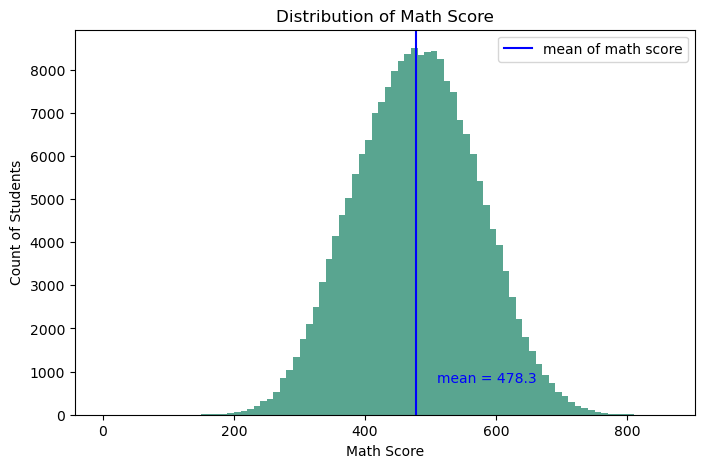

In [25]:
# plot histogram including the mean as a line
binsize = 10
bins = np.arange(0, pisa['SCORE_MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=pisa, x='SCORE_MATH', bins = bins, color = color_pisa[1])
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Count of Students')
plt.axvline(pisa['SCORE_MATH'].mean(), color='b', label= 'mean of math score')
plt.legend(loc='upper right')
plt.text(510, 1000, 'mean = {}'.format(round(pisa['SCORE_MATH'].mean(),2)), fontsize = 10, color = 'b',
         verticalalignment='top', horizontalalignment='left')
plt.show()

The result of the math test is symmetrically normally distributed around the mean score of 478.3. 

A box plot visualization helps us to outline and display statistical data such as the mean and interquartile range:

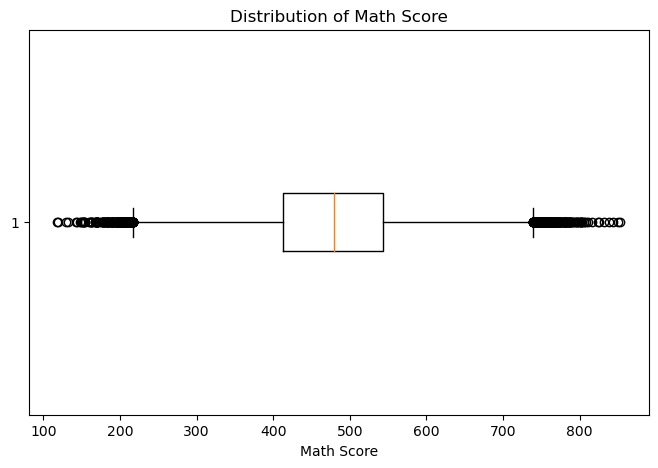

In [26]:
# Visualise on a box-plot
plt.figure(figsize=[8, 5])
plt.boxplot(data=pisa, x='SCORE_MATH', vert=False)
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.show()

Although the range of results in the math score is between 117 and 853, the interquartile range is relatively short (between 410 and 540). There are also outliers with very low scores around 120 and very good scores from highly gifted students around 850.

##### 2.2.1.2 Exploration of the reading score

Now let's take a closer look at the distribution of the reading score:

In [27]:
# use describe to get statistical information on the reading score
pisa['SCORE_READ'].describe()

count    207560.000000
mean        476.399990
std         102.726093
min          40.048000
25%         406.243000
50%         480.615500
75%         549.759000
max         883.670000
Name: SCORE_READ, dtype: float64

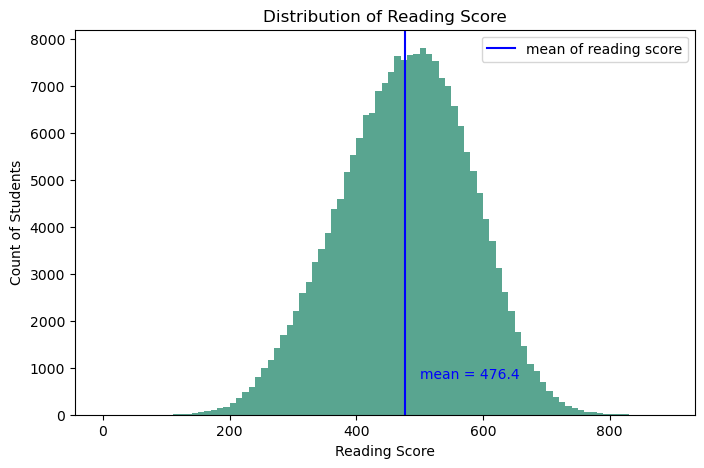

In [28]:
# plot histogram including the mean as a line
binsize = 10
bins = np.arange(0, pisa['SCORE_READ'].max()+binsize, binsize)

fig, ax = plt.subplots(figsize=(8, 5))
ax = plt.hist(data=pisa, x='SCORE_READ', bins = bins, color = color_pisa[1])
plt.title('Distribution of Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Count of Students')
plt.axvline(pisa['SCORE_READ'].mean(), color='b', label= 'mean of reading score')
plt.text(500, 1000, 'mean = {}'.format(round(pisa['SCORE_READ'].mean(),2)), fontsize = 10, color = 'b',
         verticalalignment='top', horizontalalignment='left')
plt.legend(loc='upper right')

plt.show();

In [29]:
pisa['SCORE_READ'].median()

480.6155

In contrast to the math score, the reading score appears somewhat left skewed around the mean score of 476.4, which is a little smaller than the median of 480.61.

Again we use the box plot to better understand the statistics of the reading score:

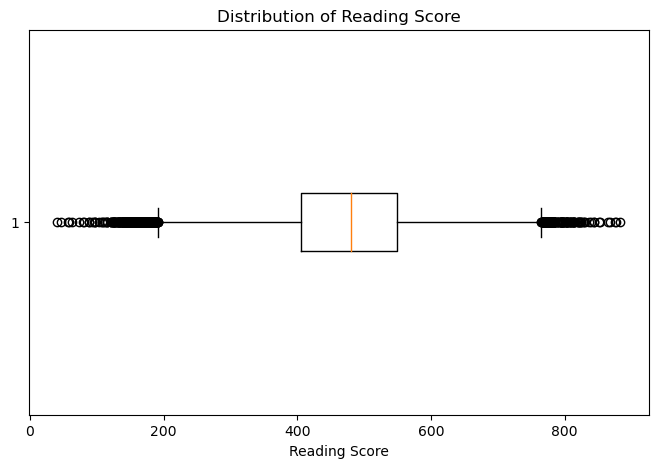

In [30]:
# Visualise on a box-plot
plt.figure(figsize=[8, 5])
plt.boxplot(data=pisa, x='SCORE_READ', vert=False)
plt.title('Distribution of Reading Score')
plt.xlabel('Reading Score')
plt.show()

Interestingly, the reading score shows an even higher range of results achieved (40 to 883 score value). 

Here too, the interquartile range is quite short and there seems to be a large number of outliers: 

There are students who only achieve a reading score of 40, which means that young people at this level cannot properly understand and confirm the meaning of short, syntactically simple sentences on a literal level. 

On the other hand, there are students who master the test with almost perfect results of 883 points.

##### 2.2.1.3 Exploration of Gender Distribution

Let's answer the question, if a gender is overrepresented in the cleaned dataset:

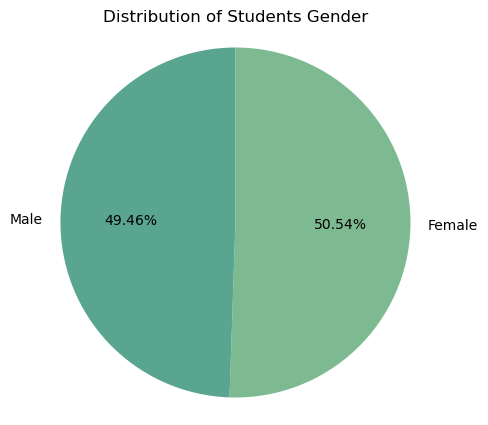

In [31]:
# plot pie chart 
labels = ['Female', 'Male']
plt.figure(figsize=[8, 5])
plt.pie(pisa['GENDER'].value_counts(), labels=labels, autopct='%.2f%%', colors = color_pisa, startangle=90, counterclock=False)
plt.axis('square')
plt.title('Distribution of Students Gender');

The number of male and female students is almost perfectly balanced at about 50% in each group.

##### 2.2.1.4 Exploration of student representation per country

Now we would like to examine how many students from each of the European countries took part:

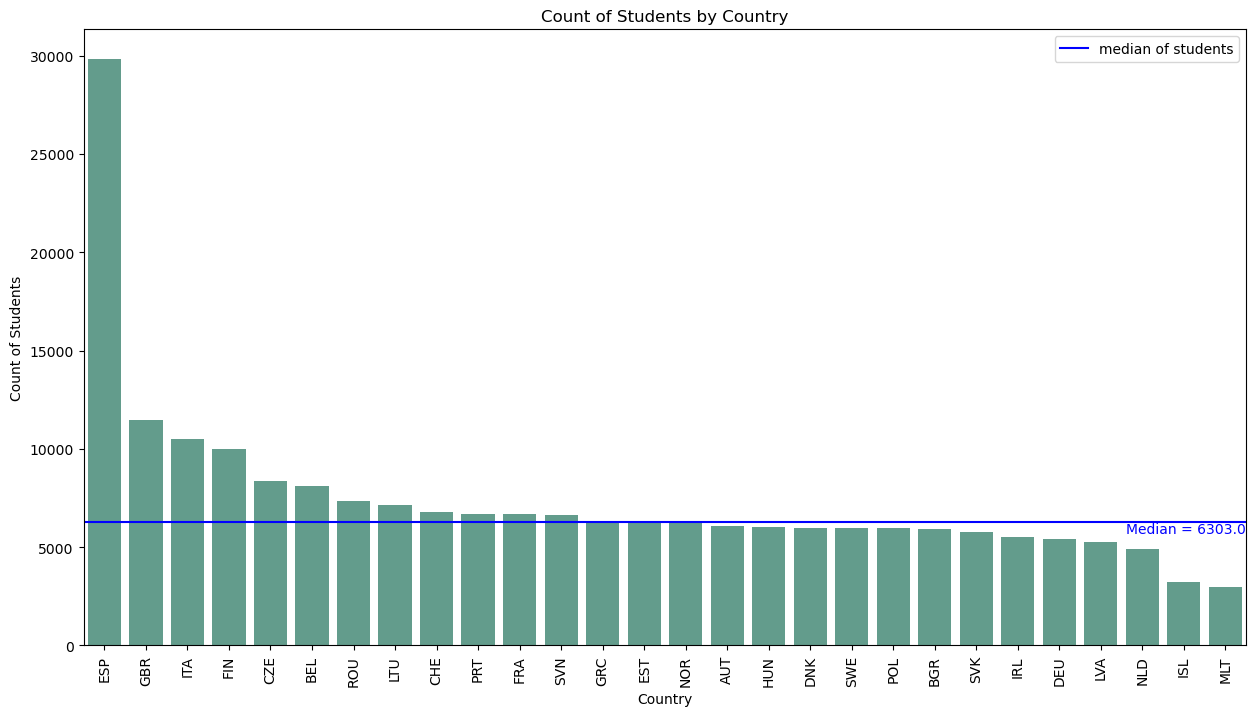

In [32]:
# define order on value counts
freq = pisa['COUNTRY'].value_counts()
gen_order = freq.index

# visualising the number of students represented per country by count plot
plt.figure(figsize=[15, 8])
ax = sb.countplot(data=pisa, x='COUNTRY', color = color_pisa[1], order= gen_order);
plt.title('Count of Students by Country')
plt.ylabel('Count of Students')
plt.xlabel('Country')
plt.axhline(pisa['COUNTRY'].value_counts().median(), color='b', label= 'median of students')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
ax.text(1, 0.2, 'Median = {}'.format(round(pisa['COUNTRY'].value_counts().median(),2)),
        verticalalignment ='top',
        horizontalalignment ='right',
        transform = ax.transAxes,
        color ='blue', fontsize = 10)
plt.show();

In fact, Spain sends more than 30,000 students to take part at the PISA test. That is almost 5 times as many students as in the rest of Europe. The median here is 6,303 students per country. Only 3000 students from the microstate Malta took part.

##### 2.2.1.5 Exploration of students siblings

Now we investigate whether the students have siblings and if so, how many?

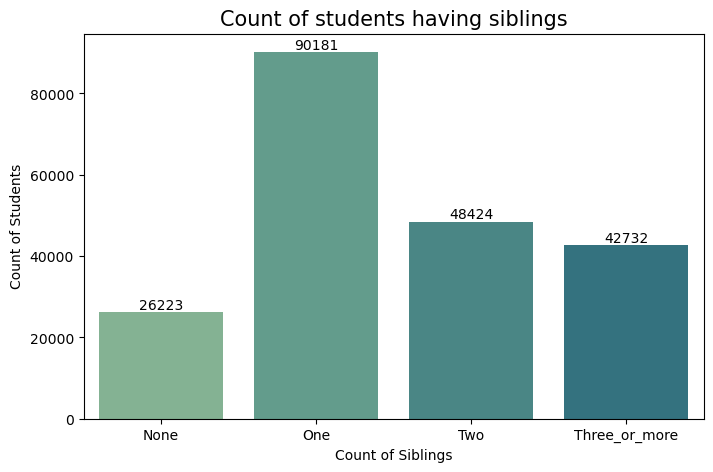

In [33]:
# plot a countplot 
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('Count of students having siblings', fontsize=15)
ax = sb.countplot(data = pisa, x='AT_HOME_SIBLING', order=["None", "One", "Two", "Three_or_more"], palette = color_pisa)

plt.xlabel('Count of Siblings')
plt.ylabel('Count of Students')

# add values above the box
ax.bar_label(ax.containers[0]);

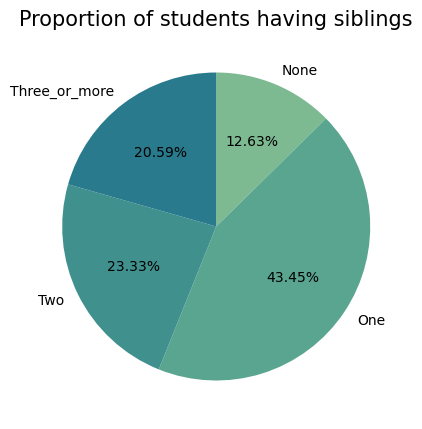

In [34]:
# define labels in order to sort it this way
labels = ["None", "One", "Two", "Three_or_more"]

# plot pie plot
fig, ax = plt.subplots(figsize=(8, 5))

#reindex(labels) sorts the index of the value counts according to the list labels
ax = pisa['AT_HOME_SIBLING'].value_counts(normalize=True).reindex(labels).plot.pie(autopct='%.2f%%', colors = color_pisa, startangle=90, counterclock=False)

ax.set_title('Proportion of students having siblings', fontsize=15)

ax.set_ylabel("")
plt.show();


Less than a quarter of the students have no siblings, 43% have only one sibling also 43% of students grow up with two ore more siblings.

##### 2.2.1.6 Exploration of students parents educational level

Now let's take a closer look at the parents. What is the educational level of the children's fathers and mothers?

In [35]:
# define labels in order to sort it this way
ed_level =["unknown", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

C:\Users\Birgit\AppData\Local\Temp\ipykernel_20536\3060921957.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


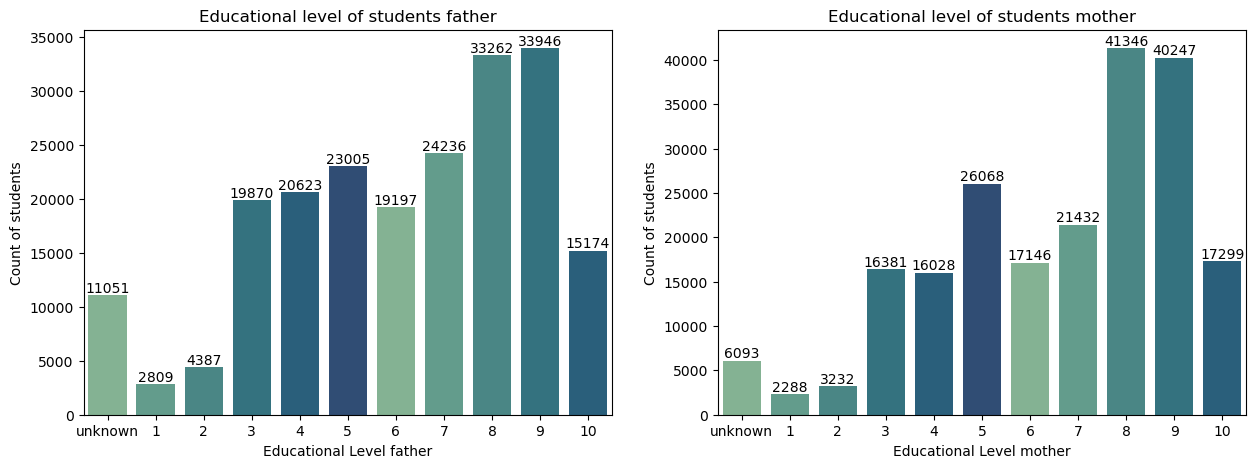

In [36]:
# create first subplot to show the countplot of the fathers education level 

fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
ax1 = sb.countplot(data = pisa, x='FATHER_EDUCATION_LEVEL', order= ed_level, palette = sb.color_palette("crest"))

plt.title('Educational level of students father')
plt.xlabel('Educational Level father')
plt.ylabel('Count of students')
ax1.bar_label(ax1.containers[0]);

# create second subplot to show the countplot of the mothers education level
plt.subplot(1,2,2)
ax2 = sb.countplot(data = pisa, x='MOTHER_EDUCATION_LEVEL', order= ed_level, palette = sb.color_palette("crest"))

plt.title('Educational level of students mother')
plt.xlabel('Educational Level mother')
plt.ylabel('Count of students')
ax2.bar_label(ax2.containers[0]);

plt.show();


In order to better understand the data, we need to review the definition of the individual levels in the codebook provided by the OECD.

International Standard Classification of Education (ISCED 97)

- 1:    Under ISCED Level 1
- 2:	ISCED Level 1 : Primary education
- 3:	ISCED Level 2 : Lower secondary education

- 4:	ISCED Level 3.3 : Upper secondary education - general or subject-specific University entrance qualification
- 5:	ISCED Level 3.4 : Upper secondary education - Completion of an apprenticeship or school Vocational training
- 6:	ISCED Level 4 : Post-secondary non-tertiary education

- 7:	ISCED Level 5 : Short-cycle tertiary education
- 8:	ISCED Level 6 : Bachelor or equivalent

- 9:	ISCED level 7 : Master or equivalent
- 10:   ISCED Level 8 : Doctoral or equivalent

Surprisingly most of the mothers and fathers of the students tested reached an high educational qualification like a Bachelor or Master degree.

I find it really difficult to distinguish between the individual educational levels. 

Therefore, I decided to define new variables in which I assign educational categories based on the ISCED groups (low, medium, high and very high education):

In [76]:
# define new column FATHER_EDUCATION_CATEGORY and convert values to descriptive text
pisa['FATHER_EDUCATION_CATEGORY'] = pisa['FATHER_EDUCATION_LEVEL'].replace(
    {1: '0_NONE', 
     2: '1_LOW EDUCATION',  3: '1_LOW EDUCATION', 
     4: '2_MEDIUM EDUCATION', 5: '2_MEDIUM EDUCATION', 6: '2_MEDIUM EDUCATION',
     7: '3_HIGH EDUCATION', 8: '3_HIGH EDUCATION',
     9: '4_VERY HIGH EDUCATION', 10: '4_VERY HIGH EDUCATION'})

# define new column MOTHER_EDUCATION_CATEGORY and convert values to descriptive text
pisa['MOTHER_EDUCATION_CATEGORY'] = pisa['MOTHER_EDUCATION_LEVEL'].replace(
    {1: '0_NONE', 
     2: '1_LOW EDUCATION',  3: '1_LOW EDUCATION', 
     4: '2_MEDIUM EDUCATION', 5: '2_MEDIUM EDUCATION', 6: '2_MEDIUM EDUCATION',
     7: '3_HIGH EDUCATION', 8: '3_HIGH EDUCATION',
     9: '4_VERY HIGH EDUCATION', 10: '4_VERY HIGH EDUCATION'})    

In [38]:
# define labels in order to sort it this way
ed_category =["unknown","0_NONE", "1_LOW EDUCATION", "2_MEDIUM EDUCATION", "3_HIGH EDUCATION", "4_VERY HIGH EDUCATION"]

Now we create the countplot again:

C:\Users\Birgit\AppData\Local\Temp\ipykernel_20536\3553428653.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


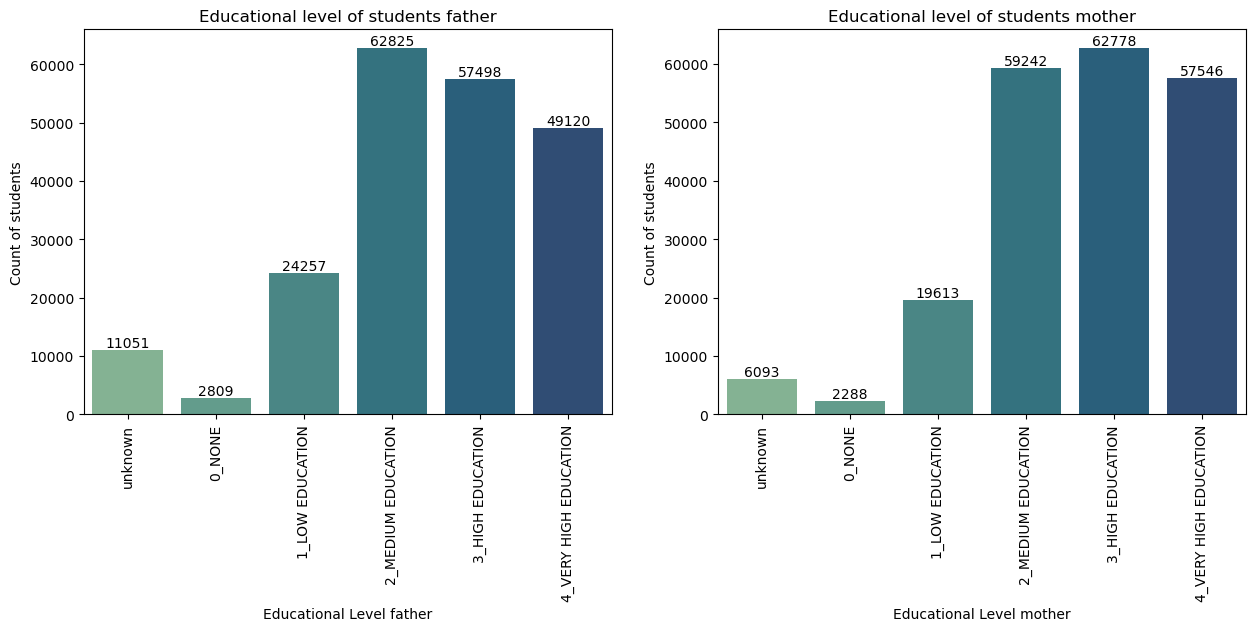

In [39]:
# create first subplot to show the countplot of the fathers education level 

fig = plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
ax1 = sb.countplot(data = pisa, x='FATHER_EDUCATION_CATEGORY', order = ed_category, palette = sb.color_palette("crest"))
plt.xticks(rotation = 90)
plt.title('Educational level of students father')
plt.xlabel('Educational Level father')
plt.ylabel('Count of students')
ax1.bar_label(ax1.containers[0]);

# create second subplot to show the countplot of the mothers education level
plt.subplot(1,2,2)
ax2 = sb.countplot(data = pisa, x='MOTHER_EDUCATION_CATEGORY', order = ed_category, palette = sb.color_palette("crest"))
plt.xticks(rotation = 90)
plt.title('Educational level of students mother')
plt.xlabel('Educational Level mother')
plt.ylabel('Count of students')
ax2.bar_label(ax2.containers[0]);

plt.show()

Thanks to the newly created data fields, you can now see at a glance that most mothers have received an high education level and that most fathers received an medium education level. 

If you compare the absolute numbers, mothers tend to be better educated than fathers.

Compared to mothers, the number of fathers with unknown educational levels is higher. This could be due to the fact that children of single mothers have little or no contact with their father and therefore cannot or do not want to answer the question.

##### 2.2.1.7 Summary of the univarate exploration
##### Math Score
The result of the math test is symmetrically normally distributed around the mean score of 478.3. Although the range of results in the math score is between 117 and 853, the interquartile range is relatively short (between 410 and 540). There are also outliers with very low scores around 120 and very good scores from highly gifted students around 850. No transformations had to be carried out.

##### Reading Score
In contrast to the math score, the reading score appears somewhat left skewed around the mean score of 476.4, which is a little smaller than the median of 480.61. Interestingly, the reading score shows an even higher range of results achieved (40 to 883 score value). Here too, the interquartile range is quite short and there seems to be a large number of outliers: There are students who only achieve a reading score of 40, which means that young people at this level cannot properly understand and confirm the meaning of short, syntactically simple sentences on a literal level. On the other hand, there are students who master the test with almost perfect results of 883 points. No transformations had to be carried out.

##### Gender
The gender entries are defined as float (1 for female and 2 for male). In order to be able to analyze the data more clearly, I converted the float values ​​into a more descriptive text (female and male).
The number of male and female students is almost perfectly balanced at about 50% in each group.

##### Country
Spain sends more than 30,000 students to take part at the PISA test. That is almost 5 times as many students as in the rest of Europe. The median here is 6,303 students per country. Only 3000 students from the microstate Malta took part. No transformations had to be carried out.

##### Siblings at home
The  entries of the count of siblings were defined as float, e.g. 1 for no siblings and 2 for one sibling. In order to be able to analyze the data more clearly, I convert the float values ​​into a more descriptive text (e.g. 1 = None, 2 = One)
Less than a quarter of the students have no siblings, 43% have only one sibling also 43% of students grow up with two ore more siblings.

##### Parents education
Most of the mothers and fathers of the students tested reached an high educational qualification like a Bachelor or Master degree.
I decided to define new variables in which I assign educational categories based on the ISCED groups (low, medium, high and very high education).
Thanks to the newly created data fields, you can now see at a glance that most mothers have received an high education level and that most fathers received an medium education level. If you compare the absolute numbers, mothers tend to be better educated than fathers.
Compared to mothers, the number of fathers with unknown educational levels is higher. This could be due to the fact that children of single mothers have little or no contact with their father and therefore cannot or do not want to answer the question.

#### 2.2.2 Bivariate Exploration


##### 2.2.2.1 Exploration of students mean math and reading score per country

Let's now move on to examining the extent to which students' place of residence has an influence on math and reading scores.

In [40]:
# for better performance I define a data frame that only contains 'COUNTRY','SCORE_MATH','SCORE_READ'
pisa_cnt_score = pisa[['COUNTRY','SCORE_MATH','SCORE_READ']]

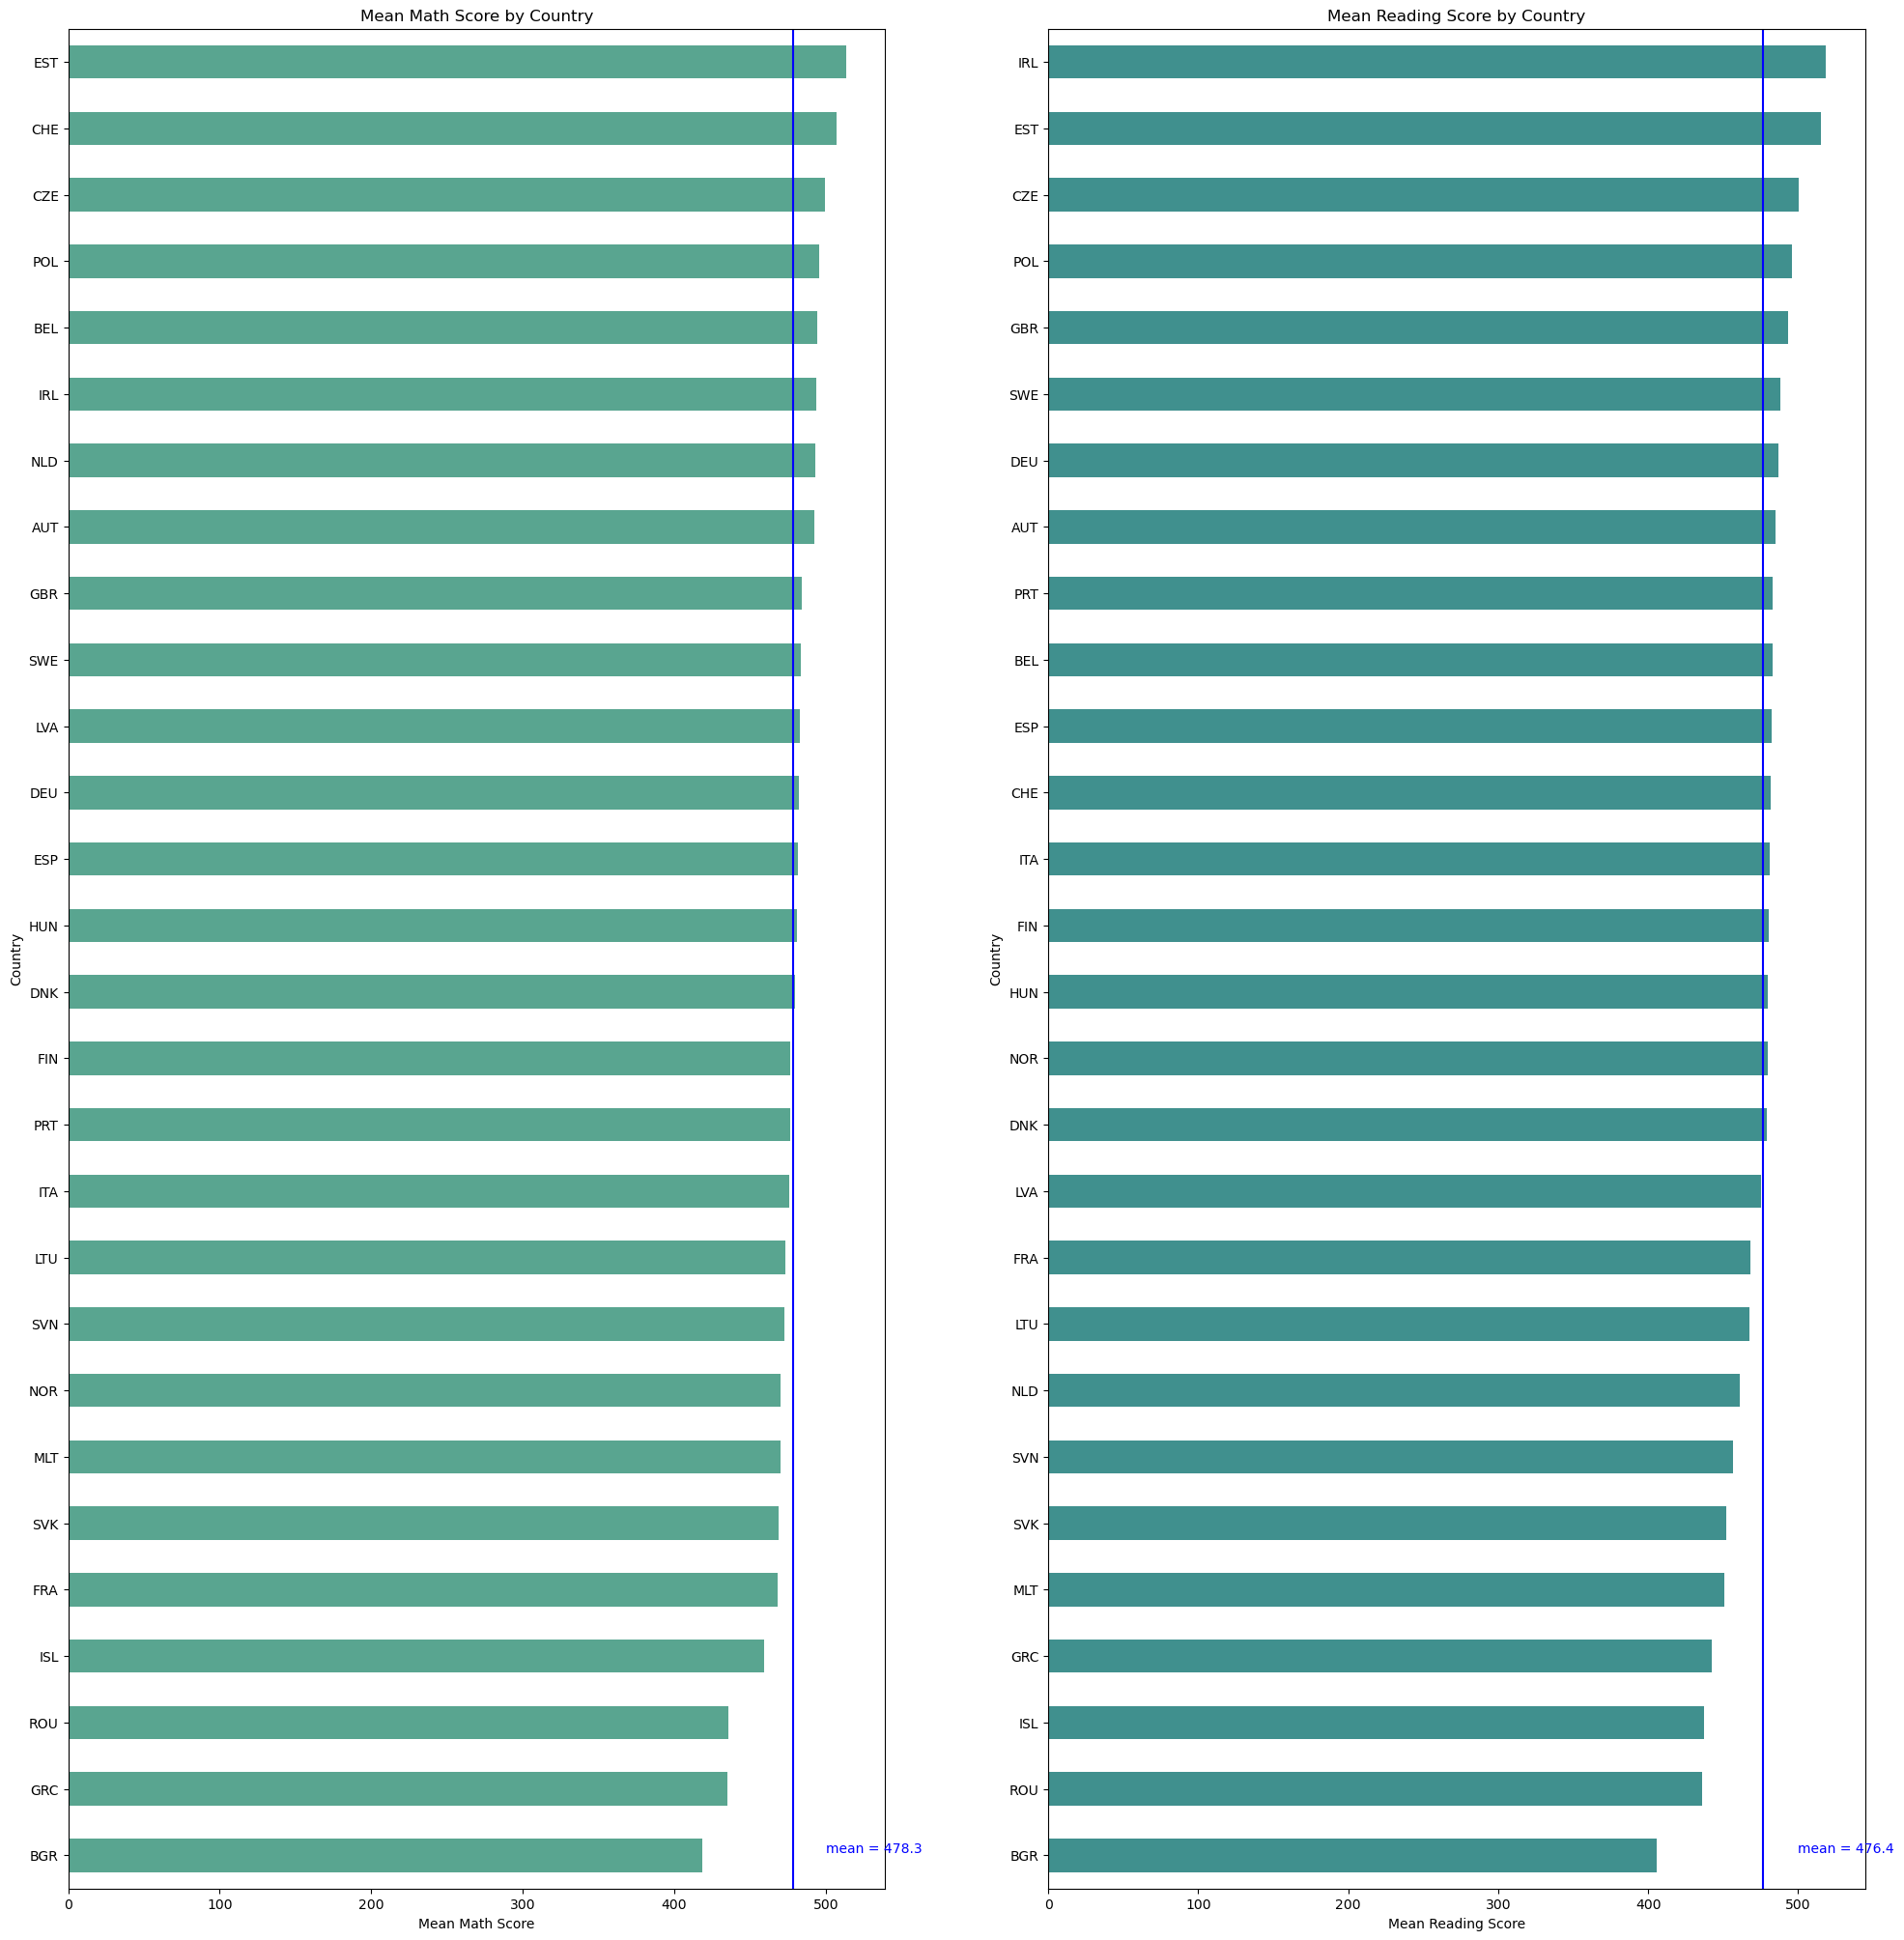

In [41]:
plt.figure(figsize=[24, 25])
plt.subplot(1,2,1)
pisa_cnt_score.groupby('COUNTRY').mean()['SCORE_MATH'].sort_values(ascending=True).plot(kind='barh', color = sb.color_palette("crest")[1])
plt.title('Mean Math Score by Country')
plt.xlabel('Mean Math Score')
plt.ylabel('Country')
plt.axvline(pisa['SCORE_MATH'].mean(), color='b')
plt.text(500, 0.2, 'mean = {}'.format(round(pisa_cnt_score['SCORE_MATH'].mean(),2)), fontsize = 10, color = 'b',
         verticalalignment='top', horizontalalignment='left')

plt.subplot(1,2,2)
pisa_cnt_score.groupby('COUNTRY').mean()['SCORE_READ'].sort_values(ascending=True).plot(kind='barh', color = sb.color_palette("crest")[2])
plt.title('Mean Reading Score by Country')
plt.xlabel('Mean Reading Score')
plt.ylabel('Country')
plt.axvline(pisa['SCORE_READ'].mean(), color='b')
plt.text(500, 0.2, 'mean = {}'.format(round(pisa_cnt_score['SCORE_READ'].mean(),2)), fontsize = 10, color = 'b',
         verticalalignment='top', horizontalalignment='left')

plt.show()

The students of Estland and Czech Republic were able to get results in the top three places in math and reading. Also Poland was able to achieve forth place in both categories. The students in Romania and Bulgaria seem to have the worst academic conditions. They finish last in both categories.

##### 2.2.2.2 Exploration of students distribution of math score per country

Next we look at the distribution of mathematics results by country:

D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


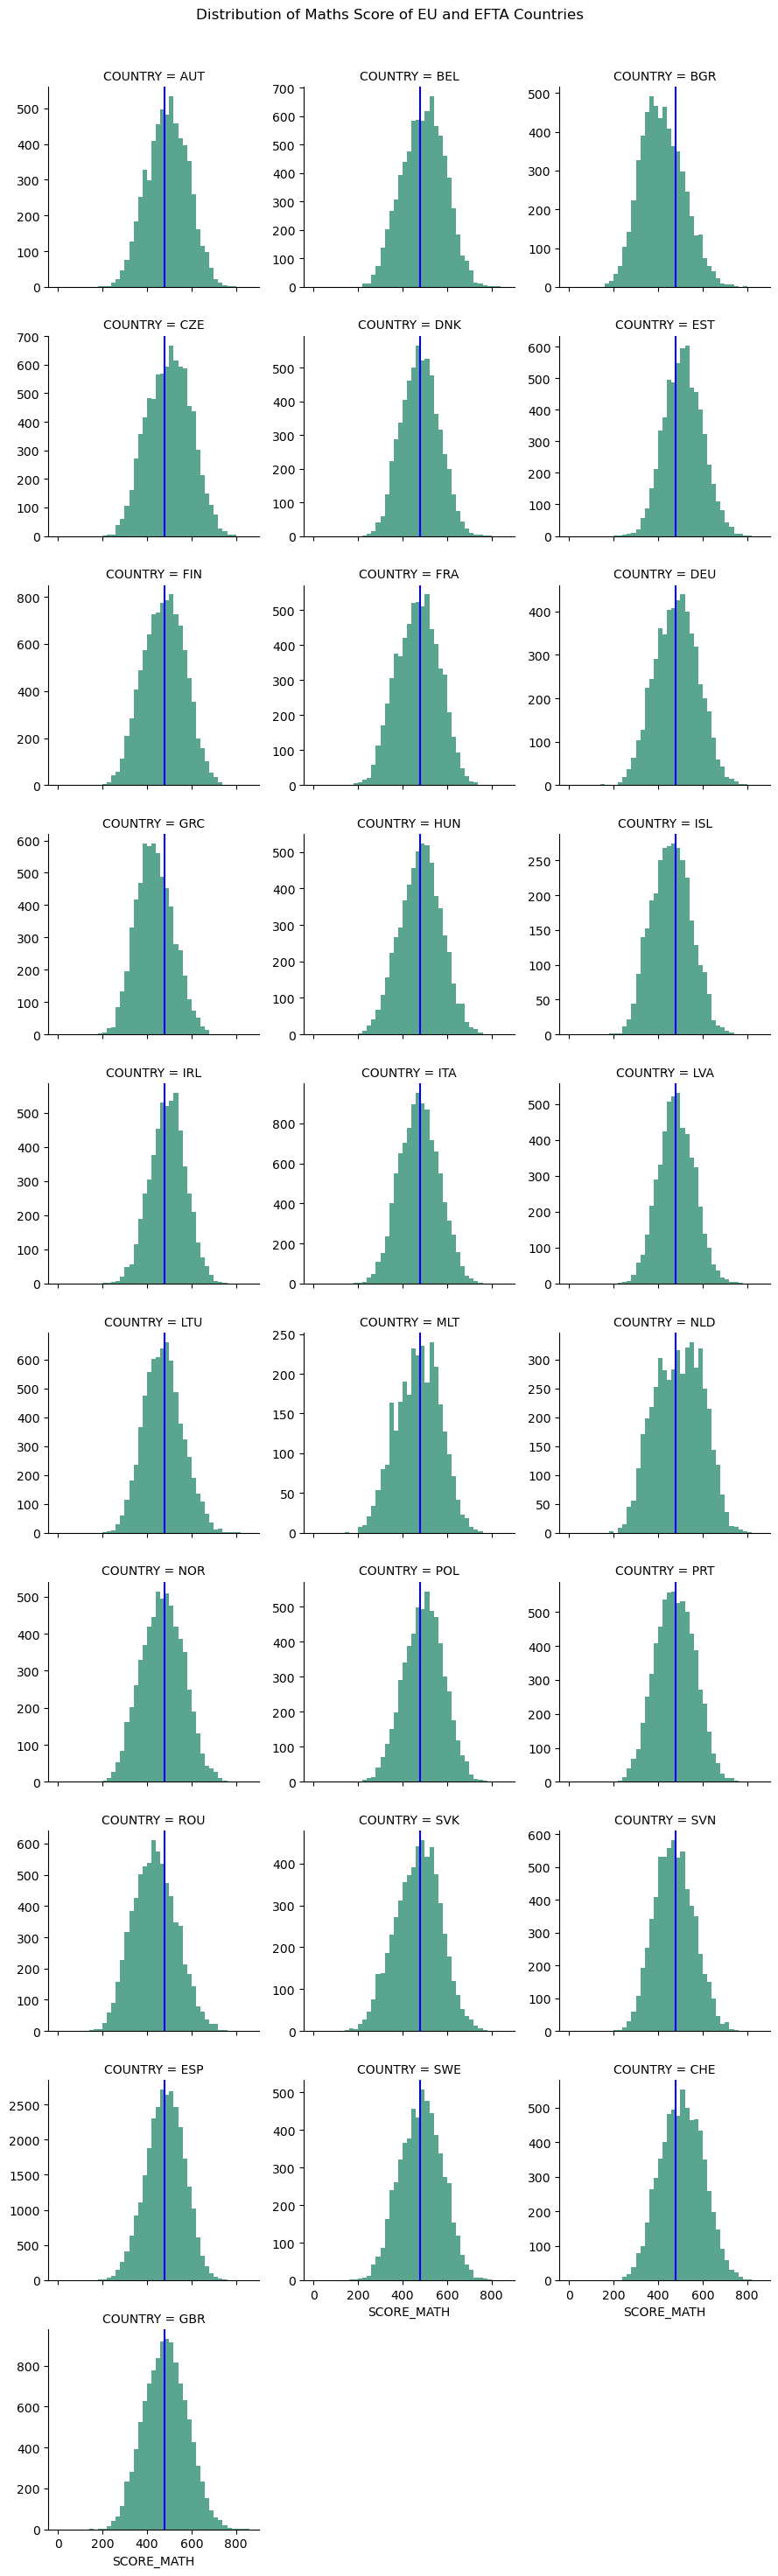

In [42]:
# FacetGrid for distribution of maths score according to EU and EFTA countries
binsize = 20
bin_edges = np.arange(0, pisa_cnt_score['SCORE_MATH'].max()+binsize, binsize)

g = sb.FacetGrid(data = pisa_cnt_score, col='COUNTRY', col_wrap=3, sharey = False, margin_titles=True)
g.map(plt.hist, 'SCORE_MATH', bins = bin_edges,  color = sb.color_palette("crest")[1])
g.refline(x=pisa_cnt_score['SCORE_MATH'].mean(), color='b', linestyle='-',)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Maths Score of EU and EFTA Countries');

For most countries the distribution appears to be symmetrical. The distribution of the countries Bulgaria, Greece, Iceland and Romania are right skewed. This means that they tend to perform worse than students from other European countries. On the other hand, the distribution of the countries Czech Republic, Estonia, Switzerland and Poland appear left skewed, which means they they achieve better math results than the European average.

##### 2.2.2.3 Exploration of students distribution of reading score per country

Now we look at the distribution of reading results by country:

D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


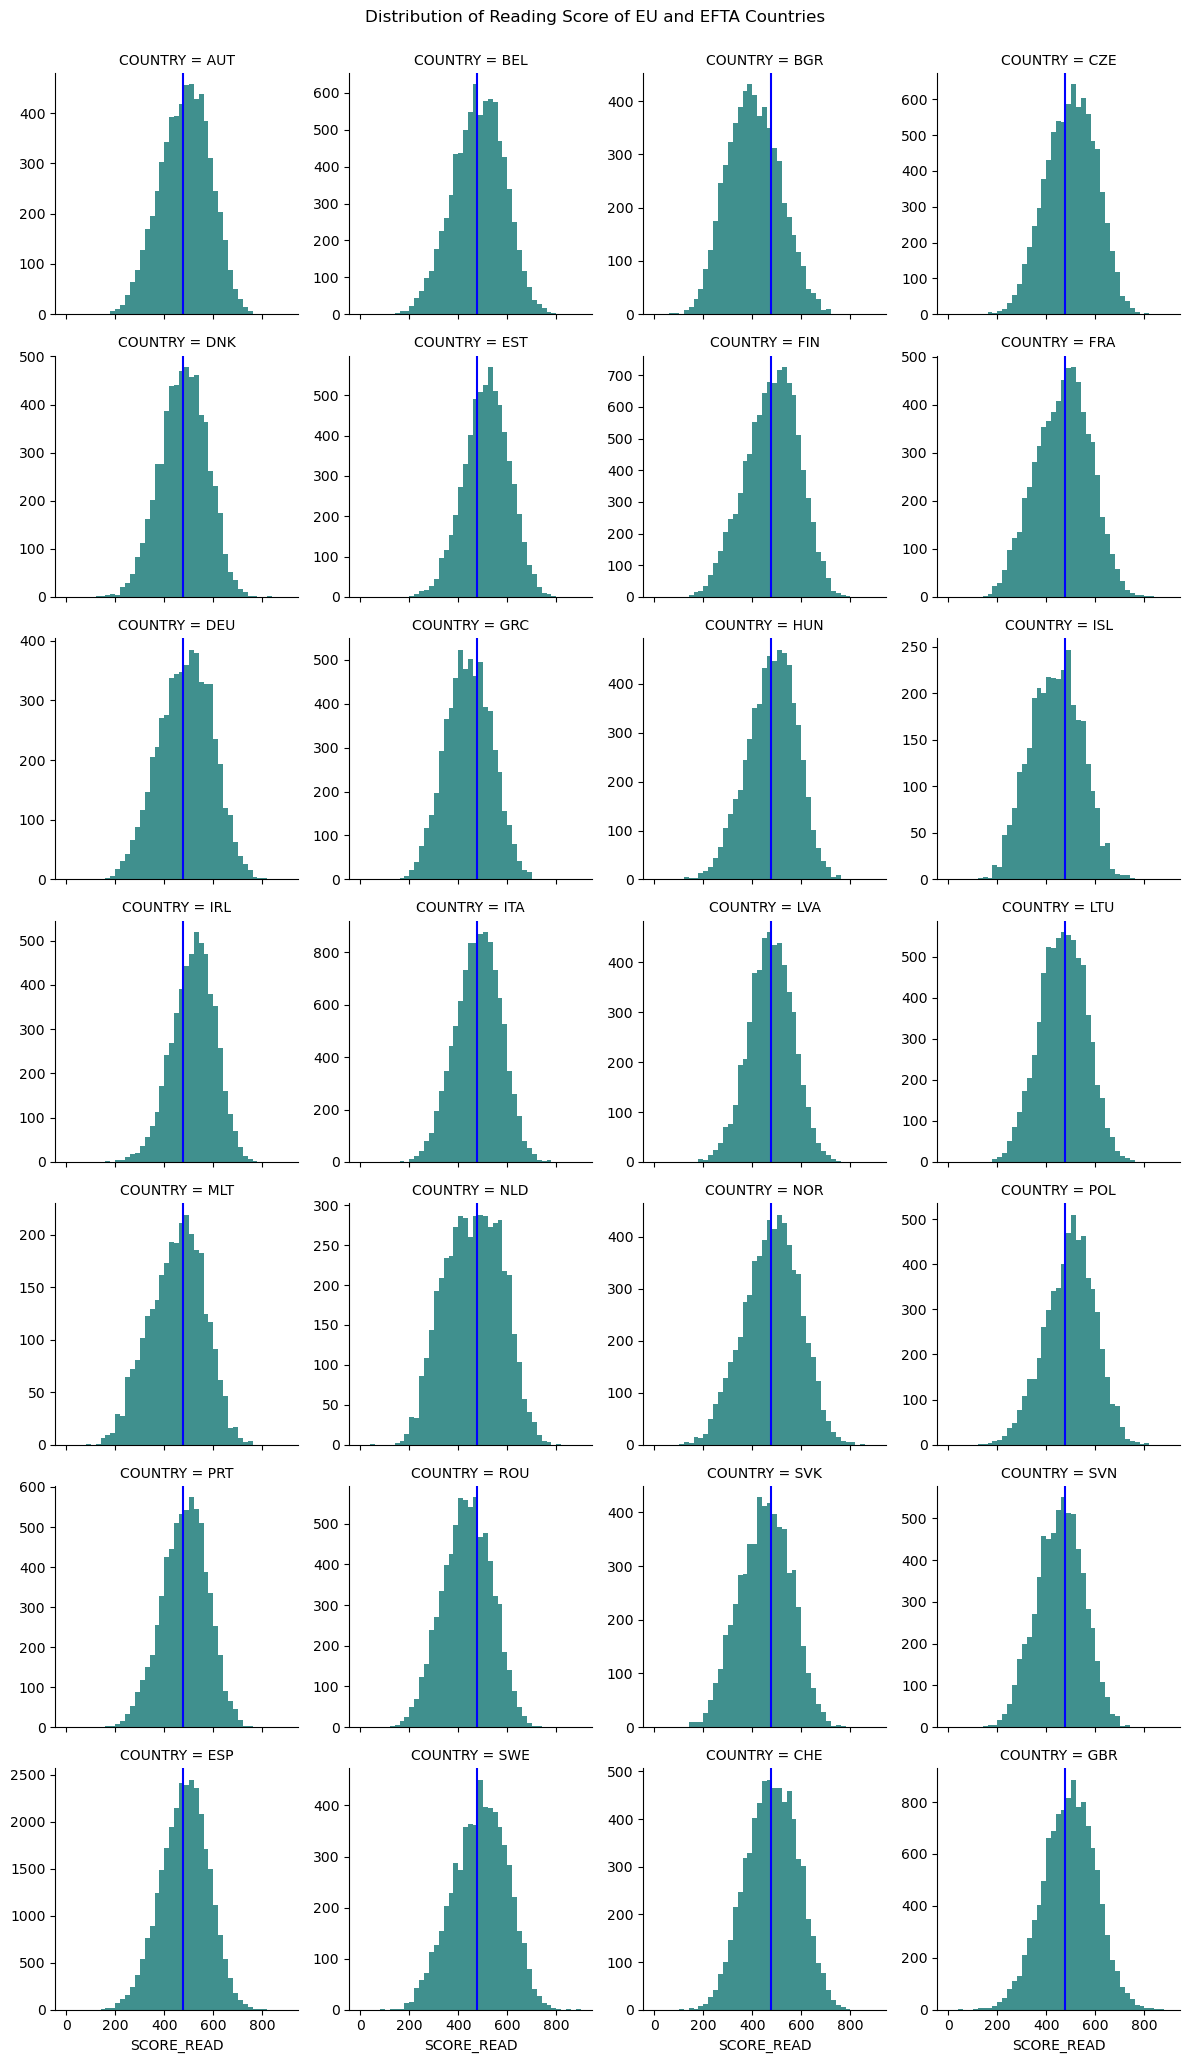

In [43]:
# FacetGrid for distribution of maths score according to EU and EFTA countries
binsize = 20
bin_edges = np.arange(0, pisa_cnt_score['SCORE_READ'].max()+binsize, binsize)

g = sb.FacetGrid(data = pisa, col='COUNTRY', col_wrap=4, sharey = False, margin_titles=True)
g.map(plt.hist, 'SCORE_READ', bins = bin_edges,  color = sb.color_palette("crest")[2])
g.refline(x=pisa_cnt_score['SCORE_READ'].mean(), color='b', linestyle='-',)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Reading Score of EU and EFTA Countries');

Here too, the distributions of reading scores in most countries are symmetrical. The distribution of the countries Bulgaria, Greece, Iceland and Romania is skewed to the right, i.e. they tended to perform worse on the reading test, while the distribution of the Czech Republic, Estonia, Ireland, Poland and Great Britain appears skewed to the left, i.e. they tended to do better on the reading test.

##### 2.2.2.4 Exploration of students distribution of math and reading score per gender

Can we proof the "common knowledge", that boys are better at math and girls read better than boys? 
Let's look at the distribution of mathematics and reading results grouped by gender.

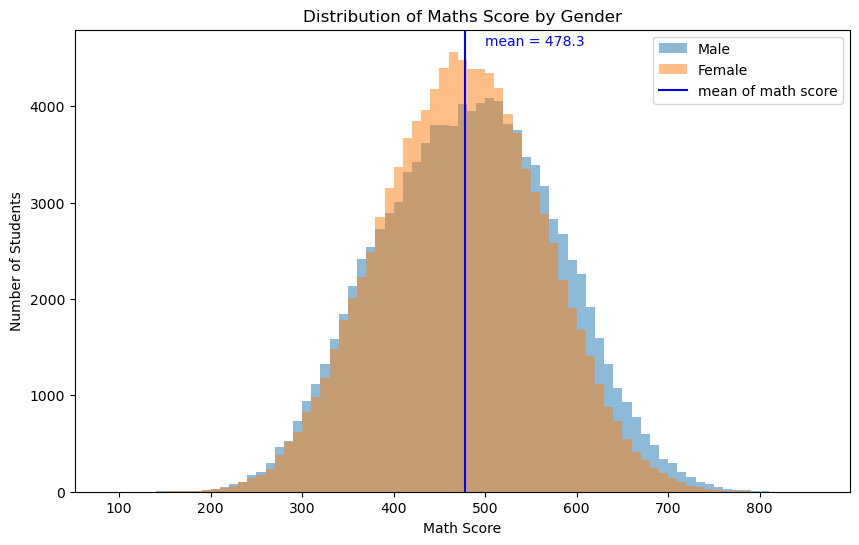

In [44]:
# Histogram for both males and females' maths scores
binsize = 10
bins_1 = np.arange(90, pisa['SCORE_MATH'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data=pisa[pisa['GENDER']=='Male'], x='SCORE_MATH', bins = bins_1, label='Male', alpha=0.5)
plt.hist(data=pisa[pisa['GENDER']=='Female'], x='SCORE_MATH', bins = bins_1, label='Female', alpha=0.5)
plt.axvline(pisa['SCORE_MATH'].mean(), color='b', label= 'mean of math score')
plt.title('Distribution of Maths Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.text(500, 4750, 'mean = {}'.format(round(pisa['SCORE_MATH'].mean(),2)), fontsize = 10, color = 'b',verticalalignment='top', horizontalalignment='left')

plt.legend()
plt.show()



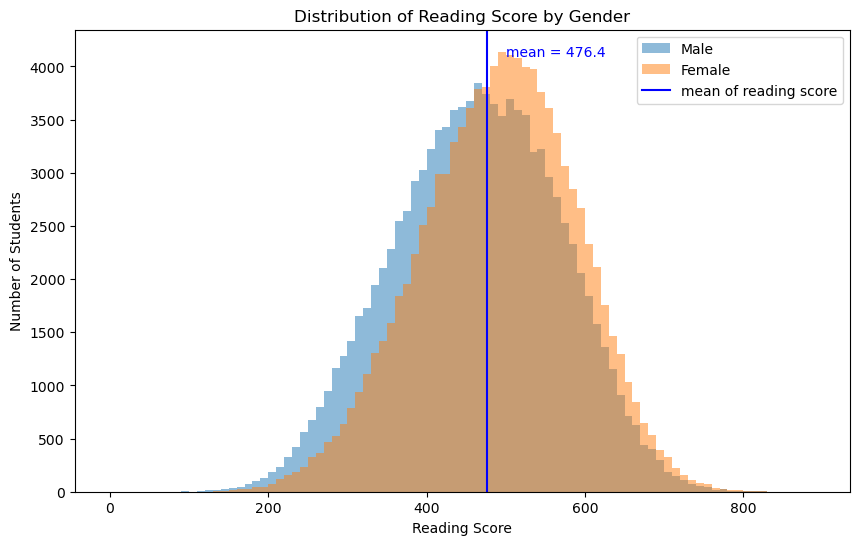

In [45]:
# Histogram for both males and females' reading scores
binsize = 10
bins_2 = np.arange(0, pisa['SCORE_READ'].max()+binsize, binsize)
plt.figure(figsize=[10, 6])
plt.hist(data=pisa[pisa['GENDER']=='Male'], x='SCORE_READ', bins = bins_2, label='Male', alpha=0.5)
plt.hist(data=pisa[pisa['GENDER']=='Female'], x='SCORE_READ', bins = bins_2, label='Female', alpha=0.5)
plt.axvline(pisa['SCORE_READ'].mean(), color='b', label= 'mean of reading score')
plt.title('Distribution of Reading Score by Gender')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')

plt.text(500, 4200, 'mean = {}'.format(round(pisa['SCORE_READ'].mean(),2)), fontsize = 10, color = 'b',verticalalignment='top', horizontalalignment='left')
plt.legend()
plt.show()


For boys, the distribution of math test results is slightly skewed to the left, while the distribution for girls appears slightly skewed to the right. This means that boys, on average, achieve better results in math tests than girls.

When it comes to reading results, girls are clearly ahead. The distribution is clearly skewed to the left, while the distribution of boys appears to be skewed to the right. This means that on average, girls achieve significantly better results in the reading test than boys.

Unfortunately, based on the visualization, we have to confirm the prejudices.

##### 2.2.2.5 Exploration of the relationship between the education level of father and mother

What about the educational level of the parents? Is the level of education in the partnership balanced?

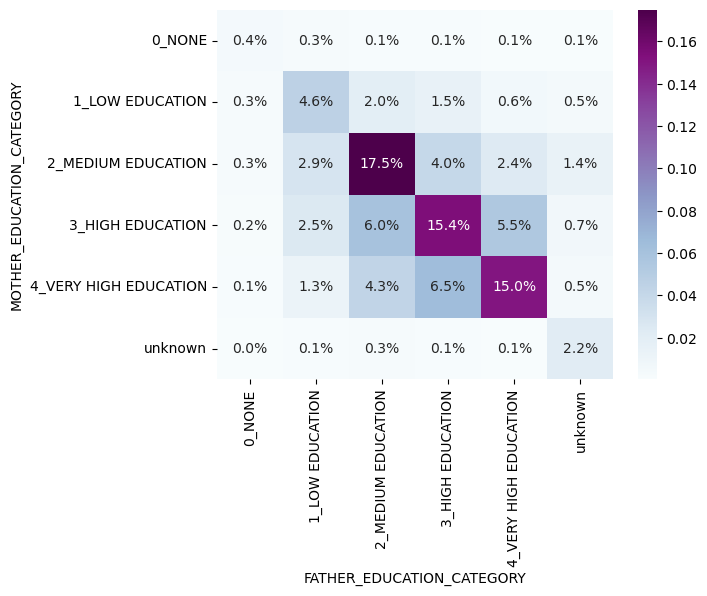

In [46]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = pisa.groupby(['MOTHER_EDUCATION_CATEGORY','FATHER_EDUCATION_CATEGORY']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'MOTHER_EDUCATION_CATEGORY', columns = 'FATHER_EDUCATION_CATEGORY', values = 'count')/207560
ct_counts.sort_index(level=0, ascending=True, inplace=True)

#Step 2 - Plot the heatmap
sb.heatmap(ct_counts, annot = True, fmt = '.1%', cmap = 'BuPu');

Yes, the saying "Birds of a feather flock together" seems to apply to parents' educational level. 

Based on the matrix above, 55% of parents remain true to their level of education when finding a partner. This is particularly true for highly and very highly educated parents.

If we add up the values ​​from the matrix and leave out the unknown ones, we come to the following conclusion: About 18% of the mothers have children's fathers with a higher level of education, about 26% have children's fathers with a lower level. This is consistent with the above statement that mothers tend to be better educated than fathers.

##### 2.2.2.6 Exploration of the relationship between the parental education level and students scores

Do all students have equal opportunities or does their performance in the PISA test depend on the level of education of their parents?

Let's now examine the connection between reading or math scores and the parents' educational level:

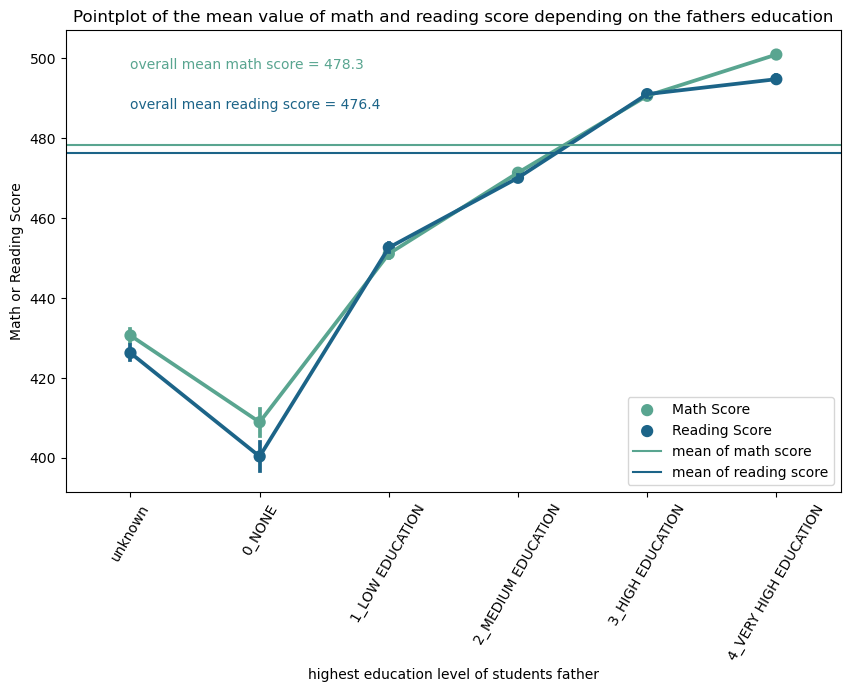

In [47]:
# point plot of maths score according to fathers highest education
plt.figure(figsize=[10, 6])
sb.pointplot(data=pisa, x="FATHER_EDUCATION_CATEGORY", y="SCORE_MATH", order =  ed_category, color = color_pisa[1], label ='Math Score')
sb.pointplot(data=pisa, x="FATHER_EDUCATION_CATEGORY", y="SCORE_READ", order =  ed_category, color = color_pisa[4], label ='Reading Score')

# add the mean as a line
plt.axhline(pisa['SCORE_MATH'].mean(), color=color_pisa[1], label= 'mean of math score')
plt.axhline(pisa['SCORE_READ'].mean(), color=color_pisa[4], label= 'mean of reading score')
plt.xticks(rotation = 60)
plt.title('Pointplot of the mean value of math and reading score depending on the fathers education')
plt.xlabel('highest education level of students father')
plt.ylabel('Math or Reading Score')
plt.text(0, 500, 'overall mean math score = {}'.format(round(pisa['SCORE_MATH'].mean(),2)), fontsize = 10, color=color_pisa[1], verticalalignment='top', horizontalalignment='left')
plt.text(0, 490, 'overall mean reading score = {}'.format(round(pisa['SCORE_READ'].mean(),2)), fontsize = 10, color=color_pisa[4],verticalalignment='top', horizontalalignment='left')
plt.legend(loc='lower right')
plt.show()


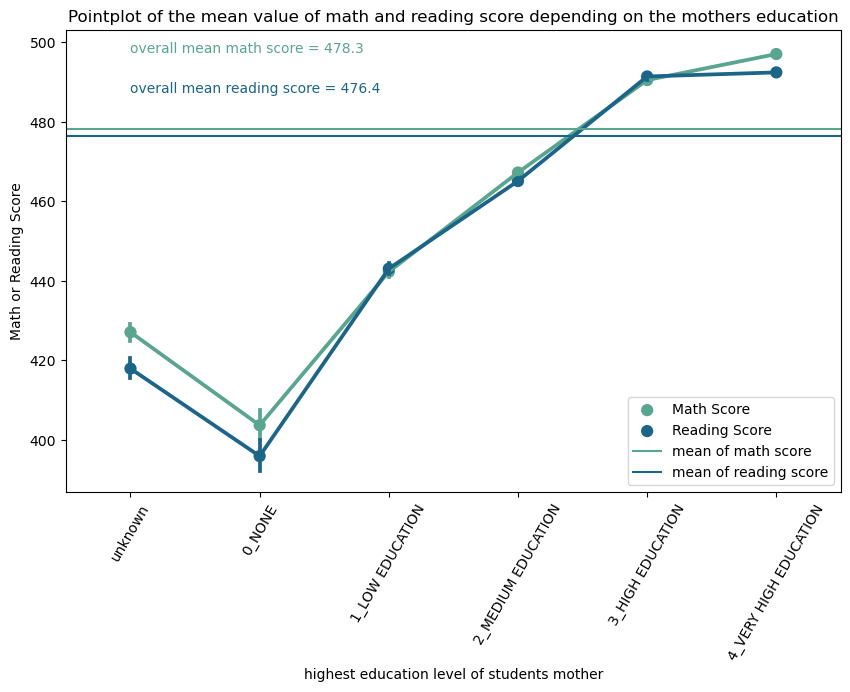

In [48]:
# point plot of maths score according to mothers highest education
plt.figure(figsize=[10, 6])
sb.pointplot(data=pisa, x="MOTHER_EDUCATION_CATEGORY", y="SCORE_MATH", order =  ed_category, color = color_pisa[1], label ='Math Score')
sb.pointplot(data=pisa, x="MOTHER_EDUCATION_CATEGORY", y="SCORE_READ", order =  ed_category, color = color_pisa[4], label ='Reading Score')

# add the mean as a line
plt.axhline(pisa['SCORE_MATH'].mean(), color=color_pisa[1], label= 'mean of math score')
plt.axhline(pisa['SCORE_READ'].mean(), color=color_pisa[4], label= 'mean of reading score')
plt.xticks(rotation = 60)
plt.title('Pointplot of the mean value of math and reading score depending on the mothers education')
plt.xlabel('highest education level of students mother')
plt.ylabel('Math or Reading Score')
plt.text(0, 500, 'overall mean math score = {}'.format(round(pisa['SCORE_MATH'].mean(),2)), fontsize = 10, color=color_pisa[1], verticalalignment='top', horizontalalignment='left')
plt.text(0, 490, 'overall mean reading score = {}'.format(round(pisa['SCORE_READ'].mean(),2)), fontsize = 10, color=color_pisa[4],verticalalignment='top', horizontalalignment='left')
plt.legend(loc='lower right')
plt.show()


Once again we have to agree with the prejudice. 

As can be seen from the visualization, in both categories, the results of students whose parents had low or no educational qualifications are significantly below average.

In contrast, the mean mathematics and reading scores of students whose parents had a high or very high level of education are above average. I find it very surprising that even students from parents with medium levels of education perform below the general average.

##### 2.2.2.6 Summary of the bivarate investigation

All in all, unfortunately, it has to be said that all existing prejudices could be confirmed by the available data set:

- ##### Boys are better in maths than girls and girls have better reading skills.

For boys, the distribution of math test results is slightly skewed to the left, while the distribution for girls appears slightly skewed to the right. 
The distribution is clearly skewed to the left, while the distribution of boys appears to be skewed to the right. 

- ##### "Birds of a feather flock together" - This saying applies to the level of education of the individual parents.

Based on the matrix above, 55% of parents remain true to their level of education when finding a partner. This is particularly true for highly and very highly educated parents. About 18% of the mothers have children's fathers with a higher level of education, about 26% have children's fathers with a lower level. This is consistent with the above statement that mothers tend to be better educated than fathers.

- ##### On average, students have higher test scores when their parents have high educational qualifications. Students of uneducated parents tend to have lower scores.

In both categories, the results of students whose parents had low or no educational qualifications are significantly below average. In contrast, the mean mathematics and reading scores of students whose parents had a high or very high level of education are above average. Students of medium-educated parents score below the general average.

#### 2.2.3 Multivariate Exploration

##### 2.2.3.1 Exploration of students math and reading score depending on siblings and gender

Now let's come to our last question: Do siblings influence test results in the PISA test?

D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\Users\Birgit\anaconda3\envs\project4\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


''

<Figure size 1000x1000 with 0 Axes>

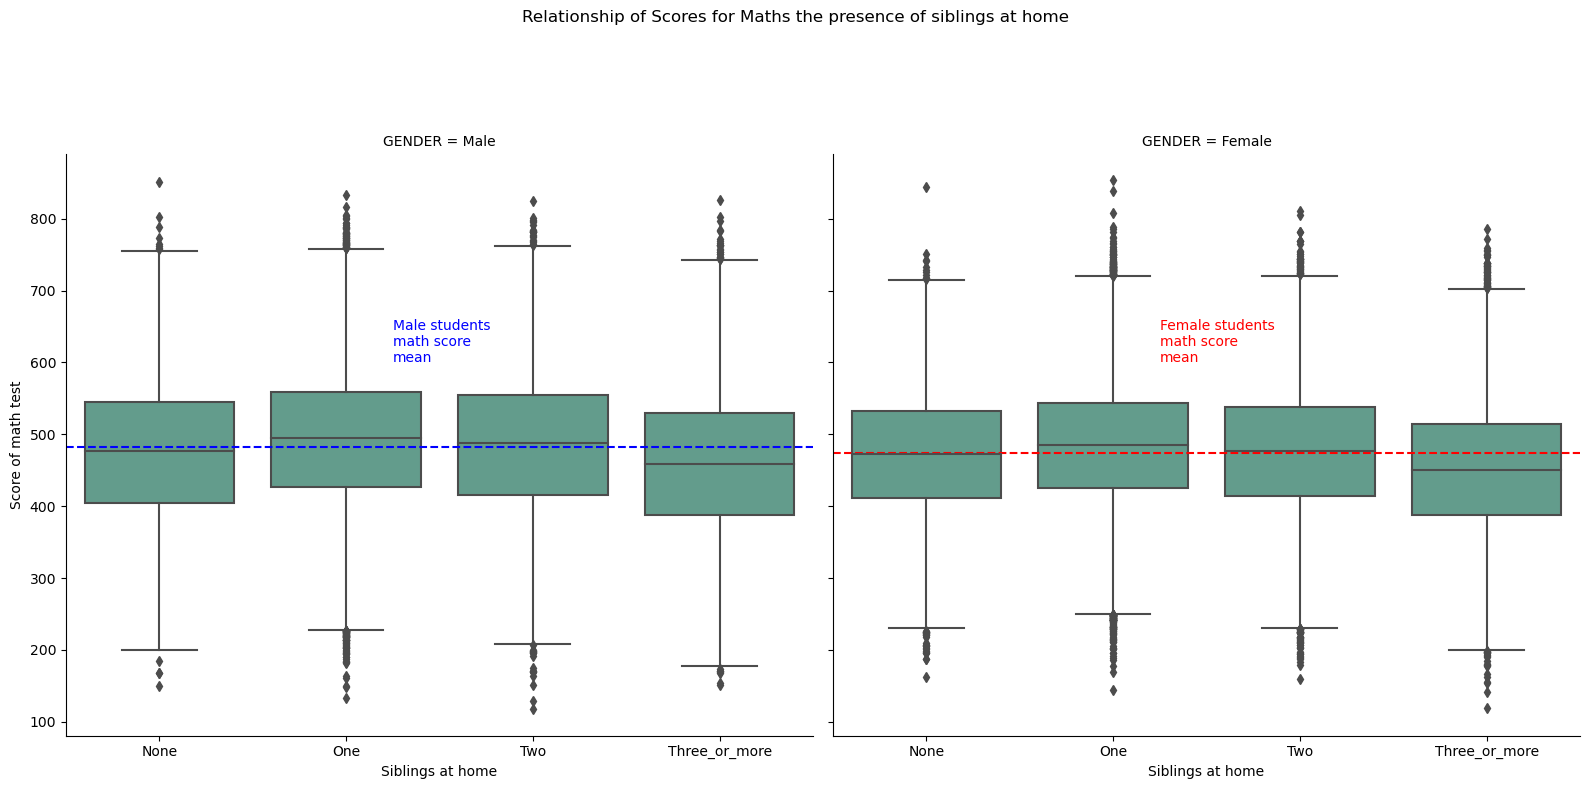

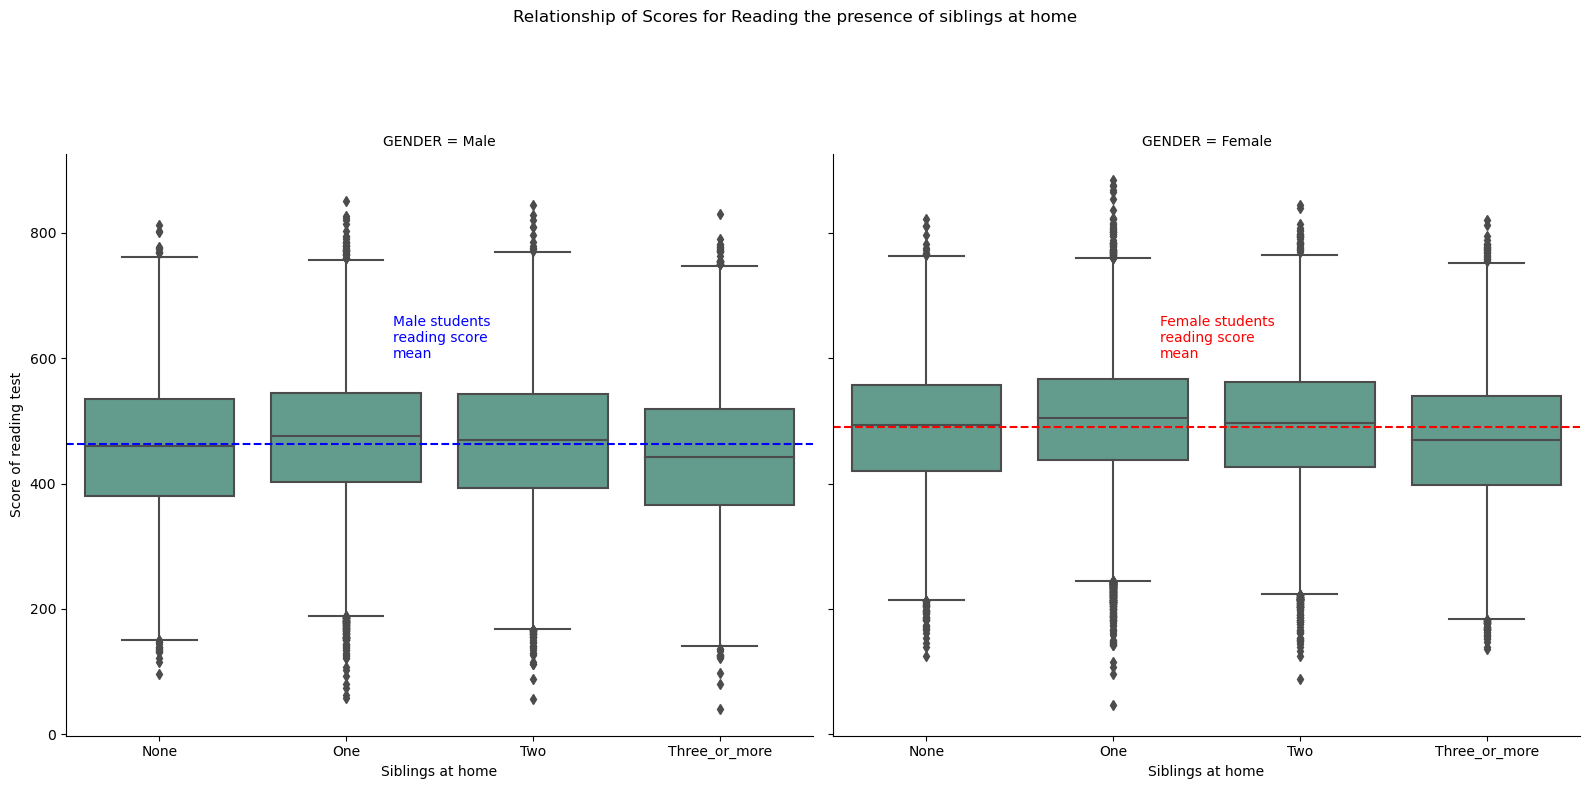

In [49]:
# FacetGrid for distribution of maths score according to siblings presence at home and gender of the student
plt.figure(figsize=[10, 10])
g1 = sb.FacetGrid(data = pisa, col = 'GENDER', height = 8)
g1.map(sb.boxplot, 'AT_HOME_SIBLING', 'SCORE_MATH', order=["None", "One", "Two", "Three_or_more"], color = sb.color_palette("crest")[1])
g1.fig.subplots_adjust(top=0.8)
g1.fig.suptitle('Relationship of Scores for Maths the presence of siblings at home')
g1.set_axis_labels("Siblings at home", "Score of math test")

# FacetGrid for distribution of reading score according to siblings presence at home and gender of the student
g2 = sb.FacetGrid(data = pisa, col = 'GENDER', height = 8)
g2.map(sb.boxplot, 'AT_HOME_SIBLING', 'SCORE_READ', order=["None", "One", "Two", "Three_or_more"], color = sb.color_palette("crest")[1])
g2.fig.subplots_adjust(top=0.8)
g2.set_axis_labels("Siblings at home", "Score of reading test")
g2.fig.suptitle('Relationship of Scores for Reading the presence of siblings at home')

# add corresponding overall mean lines to each box plot
ax1, ax2 = g1.axes[0]

ax1.axhline(pisa.query('GENDER=="Male"').SCORE_MATH.mean(), color='b', ls='--')
ax2.axhline(pisa.query('GENDER=="Female"').SCORE_MATH.mean(), color='r', ls='--')

ax1.text(1.25,600, 'Male students\nmath score\nmean', color='b')
ax2.text(1.25,600, 'Female students\nmath score\nmean', color='r')

ax3, ax4 = g2.axes[0]

ax3.axhline(pisa.query('GENDER=="Male"').SCORE_READ.mean(), color='b', ls='--')
ax4.axhline(pisa.query('GENDER=="Female"').SCORE_READ.mean(), color='r', ls='--')

ax3.text(1.25,600, 'Male students\nreading score\nmean', color='b')
ax4.text(1.25,600, 'Female students\nreading score\nmean', color='r')

;

If you look at the boxplot you can gain the following insights:

Having a single sibling has a positive effect on the result. This applies to all genders and tests. The scores of only children are slightly worse in all categories than those of students who have one sibling. The results are clearly worse for children with more than three siblings. These are noticeable due to significantly worse values ​​in the test results.

## Section 3: Linear Regression of students reading score


The most suitable machine learning approach to predict continuous numerical outputs is linear regression.

I would now like to predict the PISA reading score based on the gender, siblings, country and education level of the parents. Admittedly it's not a lot of features, but let's see where this approach takes us. 

### 3.1 Data Preprocessing

Our features are categorical data. To be able to work with them, we have to convert them into dummy variables.

For this we define a function:

In [50]:
def dummies_matrix(df, categories, feature):
    '''
    INPUT:
    df - pandas dataframe 
    categories - vector of categorical columns, that should be converted 
        into dummy/indicator variables 
    feature - column, that should be predicted later
    
    OUTPUT:
    df_new - a new dummy-coded dataframe including the feature variable
    '''    
    df_short = df[categories]
    dummies= pd.DataFrame(pd.get_dummies(df_short, dtype=int))
    df_new = pd.concat([df[feature], dummies], axis = 1)  
    return df_new

In [51]:
# define columns that should be converted
pisa_categories = ['COUNTRY', 'GENDER',  'AT_HOME_SIBLING', 'FATHER_EDUCATION_CATEGORY', 'MOTHER_EDUCATION_CATEGORY']

In [52]:
# use the defined function to convert the data
pisa_read_ml = dummies_matrix(pisa, pisa_categories, 'SCORE_READ')

In [53]:
# check the result
pisa_read_ml.head()

,SCORE_READ,COUNTRY_AUT,COUNTRY_BEL,COUNTRY_BGR,COUNTRY_CHE,COUNTRY_CZE,COUNTRY_DEU,COUNTRY_DNK,COUNTRY_ESP,COUNTRY_EST,COUNTRY_FIN,COUNTRY_FRA,COUNTRY_GBR,COUNTRY_GRC,COUNTRY_HUN,COUNTRY_IRL,COUNTRY_ISL,COUNTRY_ITA,COUNTRY_LTU,COUNTRY_LVA,COUNTRY_MLT,COUNTRY_NLD,COUNTRY_NOR,COUNTRY_POL,COUNTRY_PRT,COUNTRY_ROU,COUNTRY_SVK,COUNTRY_SVN,COUNTRY_SWE,GENDER_Female,GENDER_Male,AT_HOME_SIBLING_None,AT_HOME_SIBLING_One,AT_HOME_SIBLING_Three_or_more,AT_HOME_SIBLING_Two,FATHER_EDUCATION_CATEGORY_0_NONE,FATHER_EDUCATION_CATEGORY_1_LOW EDUCATION,FATHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,FATHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,FATHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,FATHER_EDUCATION_CATEGORY_unknown,MOTHER_EDUCATION_CATEGORY_0_NONE,MOTHER_EDUCATION_CATEGORY_1_LOW EDUCATION,MOTHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,MOTHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,MOTHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,MOTHER_EDUCATION_CATEGORY_unknown
0,572.256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,472.194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,469.357,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,615.732,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,402.787,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


### 3.2 Model Evaluation and Validation

For reasons of efficiency, I define a function that can be used for various response columns and linear regression models and outputs the metrics for the prediction.

In [54]:
def fit_Regression(df, response_col, lm_model, test_size=.2, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column, that should be predicted
    lm_model - model object from sklearn that should be used for regression
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test

    OUTPUT:
    lm_model_fit - fitted model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    mse, rmse, mean_error, mape - metrics 

    This function can be used for various response columns and linear regression models and outputs the metrics for the prediction.
    
    '''
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    #Fit the model
    lm_model_fit= lm_model.fit(X_train, y_train) 

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # calculate mean squared error
    mse = mean_squared_error(y_test, y_test_preds)
    
    # calculate root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))
    
    # calculate the absolute error
    errors = abs(y_test_preds - y_test)
    # calculate the average error
    mean_error = np.mean(errors)
    
    # calculate the mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / y_test)

    print('\033[1m' + 'Model Performance')
    print('\033[0m')
    print('Used Model: {}'.format(lm_model))
    print()
    print('Mean Squared Error of the test data: {}'.format(mse))
    print('Mean Squared Error of the training data: {}'.format(mean_squared_error(y_train, y_train_preds)))
    print()
    print('Root Mean Squared Error: {}'.format(rmse))
    print()
    print('Average Error: {:0.4f}.'.format(mean_error))
    print('Mean Absolute Percentage Error = {:0.3f}%.'.format(mape))
    
    return lm_model_fit, X_train, X_test, y_train, y_test, mse, rmse, mean_error, mape


I choose the Random Forest Regressor as machine learning model.


The functionality can be roughly summarized as follows:


1. Using bootstrapping, the entire training data set is first divided into several subsets.

2. The random forest now creates a decision tree for each of these subsets. Each tree is trained independently based on its assigned subset of training data.

3. Finally, the average of the predictions made per tree is taken to obtain the final prediction.

The advantages of the model are the high accuracy, flexibility and robustness. It can model complex, non-linear relationships between features and the target variable. Hence Random Forest Regressor can suffer from overfitting when working with noisy training data, which leads to poor predictions.

In [55]:
#Use the function
lm_model_base, X_train_base, X_test_base, y_train_base, y_test_base, mse_base, rmse_base, mean_error_base, mape_base = fit_Regression(
    pisa_read_ml, 'SCORE_READ', lm_model= RandomForestRegressor(), test_size=.2, rand_state=42)

Model Performance

Used Model: RandomForestRegressor()

Mean Squared Error of the test data: 9272.690697494334
Mean Squared Error of the training data: 8668.25776908981

Root Mean Squared Error: 96.29481137368894

Average Error: 77.0331.
Mean Absolute Percentage Error = 18.054%.


The RMSE indicates that the model misses the result by an average of 96 points. The MAPE is at 18%. Let's look at the highest deviations in the estimate to find out more:

In [56]:
# build a dataframe with the observed and predicted value, as well the absolute difference of both values (error)
y_test_preds_base = lm_model_base.predict(X_test_base)
comparison_obs_pred = pd.DataFrame(dict(observed=y_test_base, predicted= y_test_preds_base, error=abs(y_test_preds_base - y_test_base)))

# sort by the error and show the 5 highest differences
comparison_obs_pred.sort_values('error', ascending = False).head(5)

,observed,predicted,error
190392,95.632,547.453356,451.821356
119894,173.718,555.142236,381.424236
158554,830.833,452.571289,378.261711
123003,740.439,362.660525,377.778475
49831,141.335,513.787193,372.452193


Looking at the five highest deviations, you can see that the actual results are either extremely low or extremely high compared to the average.

Let's look at the data set with the highest deviation:

In [57]:
# show the entry with the highest deviation
pisa_read_ml.loc[[190392]]

,SCORE_READ,COUNTRY_AUT,COUNTRY_BEL,COUNTRY_BGR,COUNTRY_CHE,COUNTRY_CZE,COUNTRY_DEU,COUNTRY_DNK,COUNTRY_ESP,COUNTRY_EST,COUNTRY_FIN,COUNTRY_FRA,COUNTRY_GBR,COUNTRY_GRC,COUNTRY_HUN,COUNTRY_IRL,COUNTRY_ISL,COUNTRY_ITA,COUNTRY_LTU,COUNTRY_LVA,COUNTRY_MLT,COUNTRY_NLD,COUNTRY_NOR,COUNTRY_POL,COUNTRY_PRT,COUNTRY_ROU,COUNTRY_SVK,COUNTRY_SVN,COUNTRY_SWE,GENDER_Female,GENDER_Male,AT_HOME_SIBLING_None,AT_HOME_SIBLING_One,AT_HOME_SIBLING_Three_or_more,AT_HOME_SIBLING_Two,FATHER_EDUCATION_CATEGORY_0_NONE,FATHER_EDUCATION_CATEGORY_1_LOW EDUCATION,FATHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,FATHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,FATHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,FATHER_EDUCATION_CATEGORY_unknown,MOTHER_EDUCATION_CATEGORY_0_NONE,MOTHER_EDUCATION_CATEGORY_1_LOW EDUCATION,MOTHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,MOTHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,MOTHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,MOTHER_EDUCATION_CATEGORY_unknown
190392,95.632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


Ok, that's interesting. 

The student only achieved a reading score of 95, even though she is female and both parents have a very high level of education. As we saw in the bivariate analysis, these would all be criteria that indicate a high performance in the study. The child may suffer from dyslexia, meaning that even with the best educational conditions, high results in the reading test cannot be achieved.

In principle, the model seems to make correct decisions. In order to make the model more accurate, we have to exclude the outliers, i.e. particularly bad and particularly good results, from the model.

#### 3.2.1 First refinement of the data - exclude outliers

I define a subset of the pisa data, that only includes reading scores of the interquartile range plus the difference of the . Then we will repeat the test.

In [58]:
# define quartiles of the reading score
Q1 = pisa['SCORE_READ'].quantile(0.25)
Q3 = pisa['SCORE_READ'].quantile(0.75)

IQR=Q3-Q1

# define a subset of the pisa data, that only includes scores of the interquartile range
pisa_read_clean = pisa[~((pisa['SCORE_READ'] < (Q1-IQR)) |(pisa['SCORE_READ'] > (Q3+IQR)))]

In [59]:
pisa_read_clean.describe()

,STUDENT_ID,SCORE_MATH,SCORE_READ
count,2.009290e+05,200929.000000,200929.000000
mean,4.700502e+07,480.034894,479.076730
std,2.386802e+07,88.545252,94.159114
min,4.000003e+06,151.583000,262.730000
25%,2.500178e+07,416.588000,410.859000
50%,4.400444e+07,480.128000,482.085000
75%,7.240294e+07,542.521000,548.944000
max,8.265477e+07,824.254000,693.265000


In [60]:
# Use function to generate a dummy matrix on the new data frame
pisa_read_ml_imp = dummies_matrix(pisa_read_clean, pisa_categories, 'SCORE_READ')

In [61]:
#Use the function to predict the score
lm_model_imp, X_train_imp, X_test_imp, y_train_imp, y_test_imp, mse_imp, rmse_imp, mean_error_imp, mape_imp = fit_Regression(
    pisa_read_ml_imp, 'SCORE_READ', lm_model= RandomForestRegressor(), test_size=.2, rand_state=42)

Model Performance

Used Model: RandomForestRegressor()

Mean Squared Error of the test data: 8007.030591604314
Mean Squared Error of the training data: 7418.423304804694

Root Mean Squared Error: 89.48201267072794

Average Error: 72.8111.
Mean Absolute Percentage Error = 16.417%.


Now that the outliers have been removed, the result has been significantly improved. The RMSE is now only at 89,5 (an improvement of 6,5 points) and the MAPE is now only at 16.42%, which means an improvement of 1.5%.

#### 3.2.2 Second refinement of the model - find best parameters with GridSearch

Now we use GridSearchCV to improve the metrics of our model. Therefore we define a new function, that displays the results of the metrics and the best GridSearchCV parameters and estimators.

In [62]:
def fit_CVRegression(lm_model, param_grid, X_train, y_train, X_test, y_test, n_jobs=-1):
    '''
    INPUT:
    lm_model - model object from sklearn that should be used for regression
    param_grid - lists of parameter settings to try as values
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    OUTPUT:
    mse -  mean squared error of the optimal model
    rmse -  root mean squared error of the optimal model
    mean_error - average error of the optimal model
    mape - mean absolute percentage error of the optimal model (MAPE)

    This function finds the optimal model based on the given parameters. It returns the best parameters and the defined metrics.
    
    '''
    Grid = GridSearchCV(estimator=lm_model, param_grid=param_grid)
    
    #Fit the model
    lm_model_grid = Grid.fit(X_train, y_train)

    #Predict using your model
    y_test_preds = Grid.predict(X_test)
    #y_train_preds = Grid.predict(X_train)

    # calculate mean squared error
    mse = mean_squared_error(y_test, y_test_preds)
    
    # calculate root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))
    
    # calculate the absolute error
    errors = abs(y_test_preds - y_test)
    # calculate the average error
    mean_error = np.mean(errors)
    
    # calculate the mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / y_test)

    print('\033[1m' + 'Results from Grid Search' )
    print('\033[0m')
    print("\n Best Estimator:\n",Grid.best_estimator_)
    print("\n Best Parameters:\n",Grid.best_params_)
    print()
    print()
    print('\033[1m' + 'Model Performance')
    print('\033[0m')
    print('Used Model: {}'.format(lm_model))
    print()
    print('Mean Squared Error: {}'.format(mse))
    print('Root Mean Squared Error: {}'.format(rmse))
    print()
    print('Average Error: {:0.4f}.'.format(mean_error))
    print('Mean Absolute Percentage Error = {:0.3f}%.'.format(mape))

    
    return lm_model_grid, mse, rmse, mean_error, mape

Let's check whether the metrics of the RandomForestRegressor can be improved with more suitable model parameters:

In [63]:
# define the model parameters of RandomForestRegressor GridSearch
param_grid_rfr = { 
    'max_depth' : [20, None],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [1, 4],
    'n_estimators': [200, 500]
}

In [64]:
# use function defined above to find the optimal model
lm_model_rfr, mse_rfr, rmse_rfr, mean_error_rfr, mape_rfr = fit_CVRegression(
    RandomForestRegressor(random_state=42), param_grid_rfr, X_train_imp, y_train_imp, X_test_imp, y_test_imp, n_jobs=-1)

Results from Grid Search


 Best Estimator:
 RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=500, random_state=42)

 Best Parameters:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 500}


Model Performance

Used Model: RandomForestRegressor(random_state=42)

Mean Squared Error: 7834.716149201701
Root Mean Squared Error: 88.51393194973151

Average Error: 72.3297.
Mean Absolute Percentage Error = 16.334%.


In fact, the MAPE improved by 0.1% and the RMSE by 1 point.

#### 3.2.3 Third refinement of the model - try other regression models

Now we want to check whether the values ​​can be further optimized if we choose a different regression model.rations.

I decide to use the Gradient Boosting Regressor.

In a boosting model, the model is trained sequentially and each new model tries to improve the previous model.

Specifically, it iteratively updates the model's parameters to minimize a loss function such as the mean squared error of the previous model using gradient descent. 

Let's check whether this approach can further improve our prediction:

In [65]:
# define the model parameters of GradientBoostingRegressor GridSearch
param_grid_gbr = {'learning_rate': [0.01,0.04],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6]
                 }

In [66]:
# use function defined above to find the optimal model
lm_model_gbr, mse_gbr, rmse_gbr, mean_error_gbr, mape_gbr = fit_CVRegression(
    GradientBoostingRegressor(random_state=42), param_grid_gbr, X_train_imp, y_train_imp, X_test_imp, y_test_imp, n_jobs=-1)

Results from Grid Search


 Best Estimator:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=500,
                          random_state=42, subsample=0.2)

 Best Parameters:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}


Model Performance

Used Model: GradientBoostingRegressor(random_state=42)

Mean Squared Error: 7784.374895201211
Root Mean Squared Error: 88.22910458120501

Average Error: 72.0039.
Mean Absolute Percentage Error = 16.252%.


The GradientBoostingRegressor was able to improve the values ​​slightly and was identified as the best model.

#### 3.3 Summary of the final result of predicting the reading score


Let us now look at the individual results of the models:

In [67]:
# plot table for a overview of metrics
table_results = pd.DataFrame(columns=['Regression_Model', 'Data', 'MSE', 'RMSE', 'Average Error', 'MAPE' ])
table_results['Regression_Model'] = ['RandomForestRegressor', 'RandomForestRegressor', 
                                    'Grid_RandomForestRegressor',  'Grid_GradientBoostingRegressor']
table_results['Data'] = ['Outliers', 'No_Outliers', 'No_Outliers', 'No_Outliers']
table_results['MSE'] = [mse_base, mse_imp,  mse_rfr,  mse_gbr]
table_results['RMSE'] = [rmse_base, rmse_imp,  rmse_rfr, rmse_gbr]
table_results['Average Error'] = [mean_error_base, mean_error_imp,  mean_error_rfr,  mean_error_gbr]
table_results['MAPE'] = [mape_base, mape_imp, mape_rfr,  mape_gbr]

print()
print('Comparison the results')
print()
table_results


Comparison the results



,Regression_Model,Data,MSE,RMSE,Average Error,MAPE
0,RandomForestRegressor,Outliers,9272.690697,96.294811,77.033117,18.054154
1,RandomForestRegressor,No_Outliers,8007.030592,89.482013,72.811071,16.416600
2,Grid_RandomForestRegressor,No_Outliers,7834.716149,88.513932,72.329685,16.333924
3,Grid_GradientBoostingRegressor,No_Outliers,7784.374895,88.229105,72.003906,16.252384


The first model of the RandomForestRegressor gave us results with an MAPE of 18.06%. This was particularly due to the fact that extreme values ​​were included in the results.

In the second experiment, we previously removed the extreme values ​​from the data. The forecasts of our RandomForestRegressor now became significantly better. The MAPE of the data is here 16,42%. which is an improve of 1.53%.

In the next step we used cross-validation to find the best parameters of the RandomForestRegressor.

For the RandomForestRegressor I have chosen the following parameters: 

- n_estimators: The number of trees in the forest (200 or 500)
- max_depth: The maximum depth of the tree (20 or None)
  None means here, that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split (= two) samples
- min_samples_leaf: The minimum number of samples required to be at a leaf node (1 or 4)
- max_features: The number of features to consider when looking for the best split:
  - sqrt: max_features = sqrt(n_features)
  - None: max_features = n_features

The best parameters of the RandomForestRegressor were max_depth=20, max_features='sqrt', min_samples_leaf=4 and n_estimators=500.

Within the cross-validation the MAPE could be optimized further to 16,33% (-0,1%).

Finally, we tried to achieve a further improvement with the GradientBoostingRegressor.
Here the following parameters were selected for optimization:

- learning_rate: The learning rate shrinks the contribution of each tree by the given value (0.01, 0.04)
- subsample: The fraction of samples is to be used for fitting the individual base learners. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias (here 0.5 or 0.2). 
- n_estimators: The number of boosting stages to perform (100 and 500)
- max_depth: Maximum depth of the individual regression estimators (4 or 6)

The best parameters of the GradientBoostingRegressor were 'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2

Once again an improvement on the MAPE was achieved, but only a very small one of 0.08%.

#### 3.2.5 Display Feature Importances of the optimal model

Now we are still interested in which features have the greatest influence on the reading score according to the optimal model.

To represent this, I define another function:

In [68]:
def plot_feature_importance(X_train, lm_model):
    '''
    INPUT:
    X_train - the training data, so the column names can be used
    lm_model - used lm_model
    
    OUTPUT:
    coefficient - a dataframe holding the coefficient and feature
    plot of the Top 10 Global Feature Importance
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.

    '''
    coefficient = pd.DataFrame()
    coefficient['feature'] = X_train.columns
    coefficient['coefficient'] = lm_model.best_estimator_.feature_importances_
 
    coefficient = coefficient.sort_values('coefficient', ascending=False)
    
    
    # define a series containing the coefficients of the linear model and the feature names as index
    importances = pd.Series(lm_model.best_estimator_.feature_importances_, index=X_train.columns)

    #sort the values
    importances.sort_values(ascending=True, inplace=True)

    # as used ascending=True the top 10 are in the tail 
    importances_high= importances.tail(20)

    #plot a horizontal bar
    importances_high.plot.barh(color='#21918c')

    # define labels
    plt.xlabel("Importance")
    plt.ylabel("Feature")

    #define title
    plt.title("Top 20 Feature Importances")
    plt.show()
    return coefficient

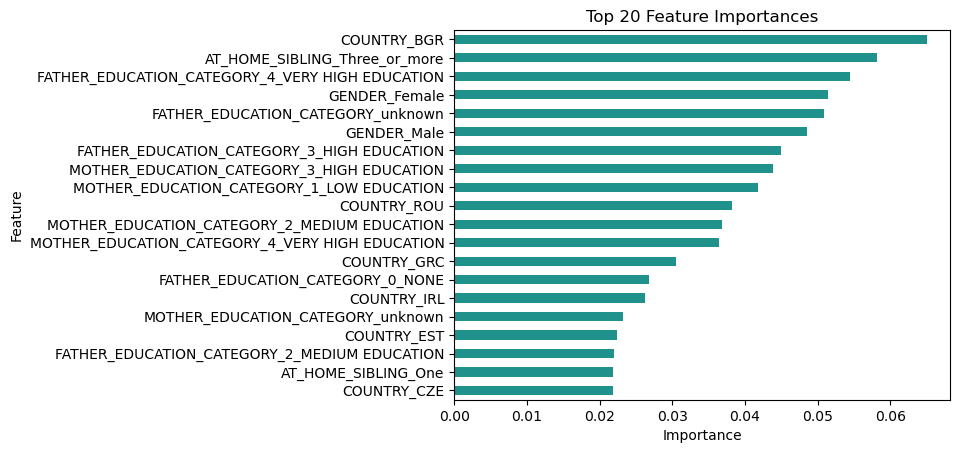

,feature,coefficient
2,COUNTRY_BGR,0.064956
32,AT_HOME_SIBLING_Three_or_more,0.058213
38,FATHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,0.054395
28,GENDER_Female,0.051420
39,FATHER_EDUCATION_CATEGORY_unknown,0.050871
29,GENDER_Male,0.048507
37,FATHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,0.044944
43,MOTHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,0.043903
41,MOTHER_EDUCATION_CATEGORY_1_LOW EDUCATION,0.041814
24,COUNTRY_ROU,0.038224


In [69]:
plot_feature_importance(X_train_imp, lm_model_gbr)

The result corresponds to the findings from the uni-, bi- and multivariate data analysis.


Unfortunately, the feature importance says nothing about whether the influence is positive or negative on the score. However, we can derive this from the previous data analysis:

Reading score is significantly influenced positively if the father has a very high level of educ and the gender of the student is femaleatbut,also  and negatively if the student has more than three siblingslives in Bulgaria male.

### Section 4: Linear Regression of students math score

We would now like to apply our findings from modeling the reading score to the math score. To do this, we repeat the steps above:

#### 4.1 Build a linear regression model of students math score

We first prepare the data set and remove the outliers of the math score.

Then we create a dummy matrix and finally predict the score using RandomForestRegressor:

In [70]:
# define quartiles of the math score
Q1 = pisa['SCORE_MATH'].quantile(0.25)
Q3 = pisa['SCORE_MATH'].quantile(0.75)

IQR=Q3-Q1

# define a subset of the pisa data, that only includes scores of the interquartile range
pisa_math_clean = pisa[~((pisa['SCORE_MATH'] < (Q1-IQR)) |(pisa['SCORE_MATH'] > (Q3+IQR)))]

# create dummy matrix using the function above
pisa_math_ml = dummies_matrix(pisa_math_clean, pisa_categories, 'SCORE_MATH')

# Use the function to predict the score using RandomForestRegressor()
lm_model_math, X_train_math, X_test_math, y_train_math, y_test_math, mse_math, rmse_math, mean_error_math, mape_math = fit_Regression(
    pisa_math_ml, 'SCORE_MATH', lm_model= RandomForestRegressor(), test_size=.2, rand_state=42)

Model Performance

Used Model: RandomForestRegressor()

Mean Squared Error of the test data: 6585.217985045266
Mean Squared Error of the training data: 6147.483766677006

Root Mean Squared Error: 81.14935603592468

Average Error: 66.0055.
Mean Absolute Percentage Error = 14.668%.


The result of the RandomForestRegressor for predicting the math score is immediately better than the reading score. 

The MAPE is at 14.67% without adjusting the parameters.

#### 4.2 First refinement of the model - find best parameters with GridSearch

Now let's try to find the best parameters of the RandomForestRegressor via cross-validation. 

For this we use the same set of parameters as for the reading score.

In [72]:
# use function defined above to find the optimal model
lm_model_math_rfr, mse_math_rfr, rmse_math_rfr, mean_error_math_rfr, mape_math_rfr = fit_CVRegression(
    RandomForestRegressor(random_state=42), param_grid_rfr, X_train_math, y_train_math, X_test_math, y_test_math, n_jobs=-1)

Results from Grid Search


 Best Estimator:
 RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=500, random_state=42)

 Best Parameters:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 500}


Model Performance

Used Model: RandomForestRegressor(random_state=42)

Mean Squared Error: 6431.169145474825
Root Mean Squared Error: 80.19457054860275

Average Error: 65.5201.
Mean Absolute Percentage Error = 14.576%.


Thanks to the improved parameters, the MAPE could be improved by around 0.1%.

#### 4.3 Second refinement of the model - try other regression models

Finally, we try out the GradientBoostingRegressor as a model alternative. 

Here too, the parameters are chosen analogously to the Reading Score.

In [73]:
# use function defined above to find the optimal model
lm_model_math_gbr, mse_math_gbr, rmse_math_gbr, mean_error_math_gbr, mape_math_gbr = fit_CVRegression(
    GradientBoostingRegressor(random_state=42), param_grid_gbr, X_train_math, y_train_math, X_test_math, y_test_math, n_jobs=-1)

Results from Grid Search


 Best Estimator:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=500,
                          random_state=42, subsample=0.5)

 Best Parameters:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


Model Performance

Used Model: GradientBoostingRegressor(random_state=42)

Mean Squared Error: 6387.293608347203
Root Mean Squared Error: 79.92054559590545

Average Error: 65.2307.
Mean Absolute Percentage Error = 14.501%.


The GradientBoostingRegressor was able to improve the values ​​again (MAPE - 0,17%) and was identified as the best model.

#### 4.4 Summary of the final result of predicting the math score

In [74]:
# plot table for a overview of metrics
table_results_math = pd.DataFrame(columns=['Regression_Model', 'MSE', 'RMSE', 'Average Error', 'MAPE' ])
table_results_math['Regression_Model'] = ['RandomForestRegressor', 'Grid_RandomForestRegressor', 'Grid_GradientBoostingRegressor']
table_results_math['MSE'] = [mse_math,mse_math_rfr,mse_math_gbr]
table_results_math['RMSE'] = [rmse_math,rmse_math_rfr,rmse_math_gbr]
table_results_math['Average Error'] = [mean_error_math,mean_error_math_rfr,mean_error_math_gbr]
table_results_math['MAPE'] = [mape_math,mape_math_rfr,mape_math_gbr]
table_results_math

,Regression_Model,MSE,RMSE,Average Error,MAPE
0,RandomForestRegressor,6585.217985,81.149356,66.005511,14.667909
1,Grid_RandomForestRegressor,6431.169145,80.194571,65.520113,14.575920
2,Grid_GradientBoostingRegressor,6387.293608,79.920546,65.230682,14.500558


We started our prediction with the default parameters of the RandomForestRegressor. The MAPE was with 14.67% already a good start.

In the next step we used cross-validation to find the best parameters of the RandomForestRegressor.

For the RandomForestRegressor I have chosen the following parameters: 

- n_estimators: The number of trees in the forest (200 or 500)
- max_depth: The maximum depth of the tree (20 or None)
  None means here, that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split (= two) samples
- min_samples_leaf: The minimum number of samples required to be at a leaf node (1 or 4)
- max_features: The number of features to consider when looking for the best split:
  - sqrt: max_features = sqrt(n_features)
  - None: max_features = n_features

The best parameters of the RandomForestRegressor were max_depth=20, max_features='sqrt', min_samples_leaf=4 and n_estimators=500.
Interestingly, the same best parameters were determined as for the reading score.

Within the cross-validation the MAPE could be optimized further to 14,58% (-0,1%).

Finally, we tried to achieve a further improvement with the GradientBoostingRegressor.
Here the following parameters were selected for optimization:

- learning_rate: The learning rate shrinks the contribution of each tree by the given value (0.01, 0.04)
- subsample: The fraction of samples is to be used for fitting the individual base learners. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias (here 0.5 or 0.2). 
- n_estimators: The number of boosting stages to perform (100 and 500)
- max_depth: Maximum depth of the individual regression estimators (4 or 6)

The best parameters of the GradientBoostingRegressor were 'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5

Once again an improvement on the MAPE was achieved, but only a small one of 0.07%.

#### 4.5 Display Feature Importances of the optimal model

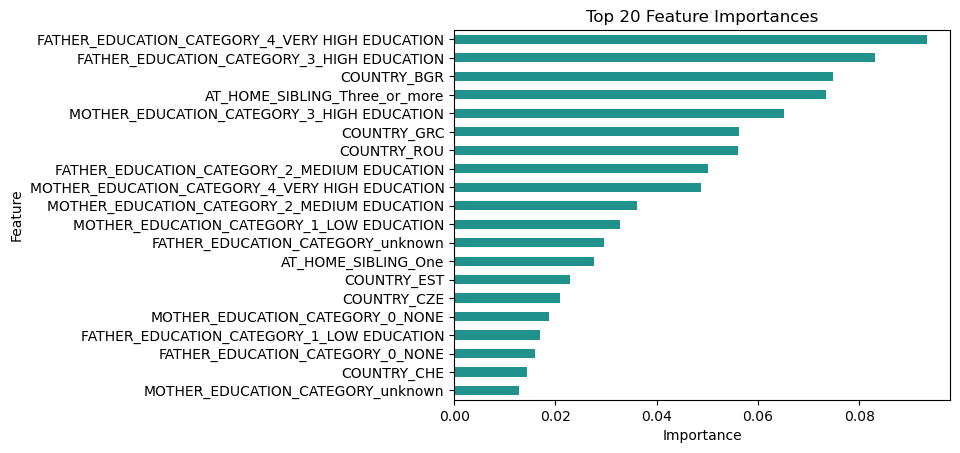

,feature,coefficient
38,FATHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,0.093262
37,FATHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,0.083125
2,COUNTRY_BGR,0.074818
32,AT_HOME_SIBLING_Three_or_more,0.073432
43,MOTHER_EDUCATION_CATEGORY_3_HIGH EDUCATION,0.065035
12,COUNTRY_GRC,0.056168
24,COUNTRY_ROU,0.056015
36,FATHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,0.050043
44,MOTHER_EDUCATION_CATEGORY_4_VERY HIGH EDUCATION,0.048789
42,MOTHER_EDUCATION_CATEGORY_2_MEDIUM EDUCATION,0.036028


In [75]:
# reuse the function defined above to display the feature importances
plot_feature_importance(X_train_math, lm_model_math_gbr)

For the math score, the result also corresponds to the findings from the uni-, bi- and multivariate data analysis.

The math score is significantly influenced positively if the father has a hight or very high level of education, and negatively if the student has more than three siblings and lives in Bulgaria.

In contrast to the reading score, the gender of the students is not really taken into account when predicting the math score. 

## Section 5: Conclusions


### 5.1 Reflection
#### 5.1.1 End-to-end process summary

First, we needed to to some data cleaning, like dropping for my analysis unnecessary columns, handling NaN's and converting values to descriptive text.
- Gender: Conversion of the float values ​​into a more descriptive text (female and male)
- Siblings: Conversion of the the float values ​​into a more descriptive text (e.g. 1 = None, 2 = One)
- Education level parents: Definition of new variables (FATHER_EDUCATION_CATEGORY, MOTHER_EDUCATION_CATEGORY) in which the respective ISCED groups are assigned to the categories of low, medium, high and very high education.

Then, an initial analysis was carried out using data visualizations:
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

Here you could already see that certain family conditions are more likely to result in a high performance in the PISA test than others:

- On average, boys achieve better results in math than girls, but girls lead in reading scores.
- The distribution of some countries are right skewed, meaning they tended to underperform at the tests.
- Having a single sibling has a positive effect on the test results. The results are clearly worse for children with more than three siblings.
- The mean math and reading skills of students whose parents had a high and very high level of education are above average, while those of students whose parents had a low or no education are well below the average. Even the students of middle-educated parents score below the general average.


In order to be able to predict the reading or math score, we first had to to convert categorical data into dummy variables.

The first model of the RandomForestRegressor gave poor reading score results of the MAPE. This was particularly due to the fact that extreme values ​​were included in the results.

In the second experiment, we previously removed the extreme values ​​from the data. The forecasts of our RandomForestRegressor now became significantly better. 

In the next step we used cross-validation to find the best parameters of the RandomForestRegressor and improved the model again. 

Finally, we tried to achieve a further improvement with the GradientBoostingRegressor. Once again an improvement on the MAPE was achieved, but only a very small one.

We then displayed the feature importances of the optimal GradientBoostingRegressor model to confirm our assumptions from the univariate, bivariate and multivariate analysis. 

#### 5.1.2 Interesting findings

All in all, unfortunately, it has to be said that all existing prejudices (Boys are better in math than girls, the educational background of the parents paves the way for their children, ...) could be confirmed by the available data set.

What surprised me most is that the presence and number of siblings also have an influence on the results. When predicting scores, having more than three siblings is one of the most important features with the highest influence.

Do then only children who enjoy the full attention of their parents generally achieve better results?

No, surprisingly that cannot be confirmed either. It appears that only children tend to do worse than students who live with one sibling.

### 5.2 Improvement

In general, I find it astonishing that with so few family background features, the score in mathematics and reading could be estimated with only an average deviation of 88-65 score points.

But of course there are still many ideas about how the analysis could be further improve:

- Improvement through more data

To further improve, we can add additional features from the large original data set, such as home possessions, parents' social classification, learning behavior or parental support. There are still so many possibilities that could influence the score.

- Improvement through alternative grouping
  
For my analysis, I grouped the parents' educational level. If I were to divide the groups differently, define more or fewer groups or forego grouping altogether, completely different results could be possible

- Improvement through more parameters
  
Due to the long calculation time, I kept the number of tested parameters small. I would like to try the sklearn RandomizedSearchCVd. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

## References

#### My own data analysis for the PISA study 2012 as part of the data analyst certification

PART_I_exploration_PISA_study_data442camp442.html 

not published, submitted to UDACITY in 10/2022 as part of Data Analyst Certification

#### Information on PISA

https://www.oecd.org/pisa/data/2022database

https://www.pisa.tum.de/fileadmin/w00bgi/www/Berichtsbaende_und_Zusammenfassungungen/pisa-2022-nationaler-bericht-berichtsband-online-anhang.pdf

#### Linear Regression Models

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://medium.com/analytics-vidhya/common-loss-functions-in-machine-learning-for-a-regression-model-27d2bbda9c93

https://www.geeksforgeeks.org/ml-gradient-boosting/

https://www.linkedin.com/advice/3/what-distinguishes-gradient-boosting-from-random-0yyre

https://www.robertthasjohn.com/post/predict-housing-prices-with-linear-regression-using-scikit-learn

https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

https://deepchecks.com/question/what-is-the-advantage-of-gradient-boosting/

https://aiml.com/what-are-the-advantages-and-disadvantages-of-random-forest/

https://discuss.boardinfinity.com/t/gradient-boosting-advantages-and-disadvantages/12577

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

#### Metrics

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

https://www.jedox.com/de/blog/fehlermasze-guete-von-forecasts-ermitteln/

#### Feature Importances

https://forecastegy.com/posts/feature-importance-in-random-forests/

#### Data visualization

https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
    

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


https://stackoverflow.com/questions/51891370/draw-a-line-at-specific-position-annotate-a-facetgrid-in-seaborn

https://github.com/mwaskom/seaborn/issues/1853

#### Other

https://github.com/udacity/machine-learning/blob/master/projects/capstone/capstone_report_template.md

https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/